## Loan Approval Prediction Model

### Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
file_path = r'/content/drive/MyDrive/financial_loan Datasets and Description__.xlsx'
df = pd.read_excel(file_path)

print("File loaded successfully!")
display(df.head())

File loaded successfully!


id address_state application_type emp_length              emp_title  \
0  1077430            GA       INDIVIDUAL   < 1 year                  Ryder   
1  1072053            CA       INDIVIDUAL    9 years         MKC Accounting   
2  1069243            CA       INDIVIDUAL    4 years  Chemat Technology Inc   
3  1041756            TX       INDIVIDUAL   < 1 year    barnes distribution   
4  1068350            IL       INDIVIDUAL  10+ years          J&J Steel Inc   

  grade home_ownership           issue_date last_credit_pull_date  \
0     C           RENT  2021-11-02 00:00:00            13-09-2021   
1     E           RENT  2021-01-01 00:00:00            14-12-2021   
2     C           RENT  2021-05-01 00:00:00   2021-12-12 00:00:00   
3     B       MORTGAGE           25-02-2021   2021-12-12 00:00:00   
4     A       MORTGAGE  2021-01-01 00:00:00            14-12-2021   

     last_payment_date  ... sub_grade        term  verification_status  \
0           13-04-2021  ...        C4   60 months      Source Verified   
1           15-01-2021  ...        E1   36 months      Source Verified   
2  2021-09-01 00:00:00  ...        C5   36 months         Not Verified   
3  2021-12-03 00:00:00  ...        B2   60 months      Source Verified   
4           15-01-2021  ...        A1   36 months             Verified   

  annual_income     dti installment int_rate  loan_amount  total_acc  \
0       30000.0  0.0100       59.83   0.1527         2500          4   
1       48000.0  0.0535      109.43   0.1864         3000          4   
2       50000.0  0.2088      421.65   0.1596        12000         11   
3       42000.0  0.0540       97.06   0.1065         4500          9   
4       83000.0  0.0231      106.53   0.0603         3500         28   

   total_payment  
0           1009  
1           3939  
2           3522  
3           4911  
4           3835  

[5 rows x 24 columns]

In [ ]:
df.shape

(38576, 24)

In [ ]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [ ]:
df.duplicated(subset='id').sum()

np.int64(0)

In [ ]:
df.duplicated(subset='member_id').sum()

np.int64(0)

We currently don't have members with more than one loan in the current dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [ ]:
df['id'] = df['id'].astype('object')
df['member_id'] = df['member_id'].astype('object')

#### Summary Statistics

In [ ]:
df.describe()

annual_income           dti   installment      int_rate   loan_amount  \
count   3.857600e+04  38576.000000  38576.000000  38576.000000  38576.000000   
mean    6.964454e+04      0.133274    326.862965      0.120488  11296.066855   
std     6.429368e+04      0.066662    209.092000      0.037164   7460.746022   
min     4.000000e+03      0.000000     15.690000      0.054200    500.000000   
25%     4.150000e+04      0.082100    168.450000      0.093200   5500.000000   
50%     6.000000e+04      0.134200    283.045000      0.118600  10000.000000   
75%     8.320050e+04      0.185900    434.442500      0.145900  15000.000000   
max     6.000000e+06      0.299900   1305.190000      0.245900  35000.000000   

          total_acc  total_payment  
count  38576.000000   38576.000000  
mean      22.132544   12263.348533  
std       11.392282    9051.104777  
min        2.000000      34.000000  
25%       14.000000    5633.000000  
50%       20.000000   10042.000000  
75%       29.000000   16658.000000  
max       90.000000   58564.000000

In [ ]:
df.describe(include="object")

id address_state application_type emp_length emp_title  grade  \
count    38576         38576            38576      38576     37138  38576   
unique   38576            50                1         11     28525      7   
top     767009            CA       INDIVIDUAL  10+ years   US Army      B   
freq         1          6894            38576       8870       135  11674   

       home_ownership           issue_date last_credit_pull_date  \
count           38576                38576                 38576   
unique              5                   65                   107   
top              RENT  2021-11-12 00:00:00            16-05-2021   
freq            18439                 2188                 10041   

       last_payment_date loan_status next_payment_date  member_id  \
count              38576       38576             38576      38576   
unique               102           3               102      38576   
top           16-05-2021  Fully Paid        16-06-2021     968043   
freq                1209       32145              1209          1   

                   purpose sub_grade        term verification_status  
count                38576     38576       38576               38576  
unique                  14        35           2                   3  
top     Debt consolidation        B3   36 months        Not Verified  
freq                 18214      2834       28237               16464

### Data Cleaning

clean up datetime columns

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)

In [ ]:
df['issue_date'] = pd.to_datetime(df['issue_date'], format='mixed', dayfirst=True)

In [ ]:
df['last_credit_pull_date'] = pd.to_datetime(df['last_credit_pull_date'], format='mixed', dayfirst=True)

In [ ]:
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'], format='mixed', dayfirst=True)

In [ ]:
df['next_payment_date'] = pd.to_datetime(df['next_payment_date'], format='mixed', dayfirst=True)

In [ ]:
df.head()

id address_state application_type emp_length              emp_title  \
0  1077430            GA       INDIVIDUAL   < 1 year                  Ryder   
1  1072053            CA       INDIVIDUAL    9 years         MKC Accounting   
2  1069243            CA       INDIVIDUAL    4 years  Chemat Technology Inc   
3  1041756            TX       INDIVIDUAL   < 1 year    barnes distribution   
4  1068350            IL       INDIVIDUAL  10+ years          J&J Steel Inc   

  grade home_ownership issue_date last_credit_pull_date last_payment_date  \
0     C           RENT 2021-11-02            2021-09-13        2021-04-13   
1     E           RENT 2021-01-01            2021-12-14        2021-01-15   
2     C           RENT 2021-05-01            2021-12-12        2021-09-01   
3     B       MORTGAGE 2021-02-25            2021-12-12        2021-12-03   
4     A       MORTGAGE 2021-01-01            2021-12-14        2021-01-15   

   loan_status next_payment_date member_id purpose sub_grade        term  \
0  Charged Off        2021-05-13   1314167     car        C4   60 months   
1   Fully Paid        2021-02-15   1288686     car        E1   36 months   
2  Charged Off        2021-09-02   1304116     car        C5   36 months   
3   Fully Paid        2021-12-04   1272024     car        B2   60 months   
4   Fully Paid        2021-02-15   1302971     car        A1   36 months   

  verification_status  annual_income     dti  installment  int_rate  \
0     Source Verified        30000.0  0.0100        59.83    0.1527   
1     Source Verified        48000.0  0.0535       109.43    0.1864   
2        Not Verified        50000.0  0.2088       421.65    0.1596   
3     Source Verified        42000.0  0.0540        97.06    0.1065   
4            Verified        83000.0  0.0231       106.53    0.0603   

   loan_amount  total_acc  total_payment  
0         2500          4           1009  
1         3000          4           3939  
2        12000         11           3522  
3         4500          9           4911  
4         3500         28           3835

check for null values

In [ ]:
df.isna().sum().sort_values(ascending=False)

emp_title                1438
id                          0
application_type            0
address_state               0
emp_length                  0
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [ ]:
(df.isna().sum().sort_values(ascending=False)/len(df))*100

emp_title                3.727706
id                       0.000000
application_type         0.000000
address_state            0.000000
emp_length               0.000000
grade                    0.000000
home_ownership           0.000000
issue_date               0.000000
last_credit_pull_date    0.000000
last_payment_date        0.000000
loan_status              0.000000
next_payment_date        0.000000
member_id                0.000000
purpose                  0.000000
sub_grade                0.000000
term                     0.000000
verification_status      0.000000
annual_income            0.000000
dti                      0.000000
installment              0.000000
int_rate                 0.000000
loan_amount              0.000000
total_acc                0.000000
total_payment            0.000000
dtype: float64

Just 3% of the data is missing

check categorical columns to see if records are accurate

In [ ]:
df['address_state'].unique()

array(['GA', 'CA', 'TX', 'IL', 'PA', 'FL', 'MI', 'RI', 'NY', 'MD', 'WI',
       'NV', 'UT', 'WA', 'NH', 'HI', 'MA', 'OK', 'NJ', 'OH', 'AZ', 'CT',
       'MN', 'CO', 'TN', 'VA', 'MO', 'DE', 'NM', 'LA', 'AR', 'KY', 'NC',
       'SC', 'WV', 'KS', 'WY', 'OR', 'AL', 'VT', 'MS', 'DC', 'MT', 'SD',
       'AK', 'IN', 'ME', 'ID', 'NE', 'IA'], dtype=object)

In [ ]:
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [ ]:
df['emp_length'].unique()

array(['< 1 year', '9 years', '4 years', '10+ years', '3 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [ ]:
df['emp_title'].values

array(['Ryder', 'MKC Accounting', 'Chemat Technology Inc',
       'barnes distribution', 'J&J Steel Inc', 'Studio 94 Corp',
       'American Airlines', 'SCI Mahanoy', 'Tech Data Corp',
       'teltow contracting', 'Ericsson', 'myrvpartsplace.com', 'AEG LIVE',
       'henkel corporation', 'AXA Assistance', 'HSA-UWC', "Child's Day",
       'OEC Freight', 'Sandestin Beach Hilton', nan,
       'Norman G. Olson Insurance', nan, 'Infotrieve, Inc.',
       'self employed', 'Clark County School District',
       'The Mount Sinai School of Medicine', 'Blue Ridge Design Group',
       'Abbott Nutrition', 'rice &werthmann',
       'Five County Assoc of Governments', 'north ga dentention center',
       nan, 'sky powersports', 'Synovus Bank',
       'ACUMEN FISCAL AGENT/MS ROBINSON', 'inspired automation inc',
       'self', 'Able Electronics', 'Abraxas I', 'La curacao',
       'Outback Steakhouse', 'URS corp', 'walmart', 'EdgeStream Inc',
       "MAD MATT'S Bar & Grille", 'Dominos Pizza', 'Pesci 

we have very small amount of null values in this column, we can fill it with 'others' for the time being

In [ ]:
df['emp_title'] = df['emp_title'].fillna('others')

In [ ]:
df['emp_title'].isna().sum()

np.int64(0)

In [ ]:
df['grade'].unique()

array(['C', 'E', 'B', 'A', 'D', 'F', 'G'], dtype=object)

In [ ]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [ ]:
df['home_ownership'].value_counts()

home_ownership
RENT        18439
MORTGAGE    17198
OWN          2838
OTHER          98
NONE            3
Name: count, dtype: int64

In [ ]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [ ]:
df['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [ ]:
df['purpose'].unique()

array(['car', 'credit card', 'Debt consolidation', 'educational',
       'home improvement', 'house', 'major purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small business', 'vacation',
       'wedding'], dtype=object)

In [ ]:
df['sub_grade'].unique()

array(['C4', 'E1', 'C5', 'B2', 'A1', 'C3', 'C2', 'A4', 'A5', 'B5', 'B4',
       'B3', 'B1', 'D1', 'A2', 'A3', 'D4', 'D2', 'C1', 'D3', 'E3', 'F1',
       'E2', 'E5', 'D5', 'E4', 'F2', 'G3', 'F3', 'G1', 'F4', 'G4', 'G2',
       'F5', 'G5'], dtype=object)

In [ ]:
df['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [ ]:
df['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

check numerical columns if there are outliers and clean

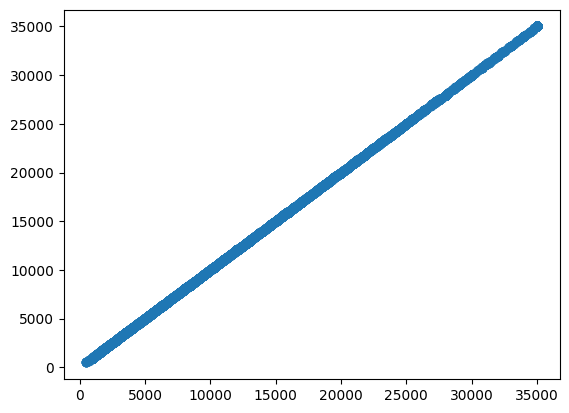

In [ ]:
plt.scatter(df['loan_amount'], df['loan_amount'])

no outlier in loan amount

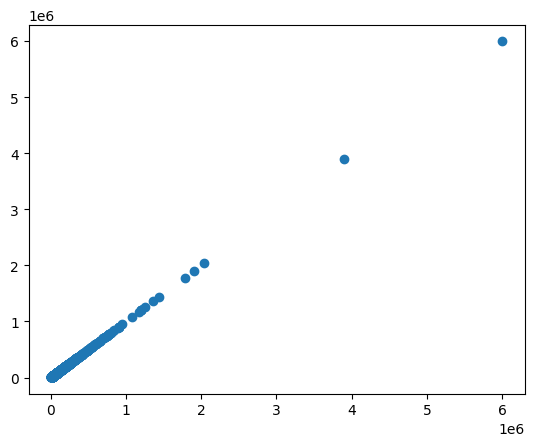

In [ ]:
plt.scatter(df['annual_income'], df['annual_income'])

In [ ]:
df['annual_income'].describe()

count    3.857600e+04
mean     6.964454e+04
std      6.429368e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.320050e+04
max      6.000000e+06
Name: annual_income, dtype: float64

 25% of the annual incomes are below 41,500 while most incomes are below 83,200 (75th percentile).

 I will be focusing on the typical income range of the members and remove the income amounts that are outliers.

In [ ]:
df[df['annual_income'] > 1000000]

id address_state application_type emp_length  \
3844   611872            TX       INDIVIDUAL    5 years   
7849   269818            FL       INDIVIDUAL   < 1 year   
8482   572697            NJ       INDIVIDUAL     1 year   
8557   453667            CO       INDIVIDUAL    9 years   
11725  884755            NY       INDIVIDUAL  10+ years   
17718  643368            CT       INDIVIDUAL  10+ years   
21467  603818            LA       INDIVIDUAL  10+ years   
21769  830027            MI       INDIVIDUAL    2 years   
26333  513542            CA       INDIVIDUAL  10+ years   
27136  519954            NM       INDIVIDUAL    3 years   
28465  458760            CA       INDIVIDUAL    7 years   
30081  528009            MD       INDIVIDUAL    8 years   
31988  468400            NY       INDIVIDUAL     1 year   
34914  551367            MD       INDIVIDUAL  10+ years   

                                emp_title grade home_ownership issue_date  \
3844                       Montgomery ISD     A       MORTGAGE 2021-10-11   
7849                        at&t wireless     C           RENT 2021-08-03   
8482                       TelSource Corp     A       MORTGAGE 2021-10-09   
8557                      Lockheed Martin     A       MORTGAGE 2021-09-11   
11725                              NYCDOE     C           RENT 2021-11-09   
17718         Convent of the Sacred Heart     A            OWN 2021-11-01   
21467                   Avis Budget Group     D           RENT 2021-10-11   
21769                 Stryker Instruments     C       MORTGAGE 2021-11-07   
26333                         post office     C       MORTGAGE 2021-10-05   
27136  Lea Regional Hospital/Pecos Valley     B       MORTGAGE 2021-10-06   
28465                     Hewlett Packard     A       MORTGAGE 2021-09-11   
30081            St. John Lutheran Church     A       MORTGAGE 2021-10-06   
31988                                 WCP     A       MORTGAGE 2021-09-12   
34914                        Dept of army     C       MORTGAGE 2021-10-07   

      last_credit_pull_date last_payment_date  loan_status next_payment_date  \
3844             2021-12-02        2021-11-08   Fully Paid        2021-11-09   
7849             2021-01-13        2021-11-03   Fully Paid        2021-11-04   
8482             2021-05-16        2021-10-13   Fully Paid        2021-11-13   
8557             2021-10-07        2021-10-07   Fully Paid        2021-10-08   
11725            2021-05-16        2021-09-14   Fully Paid        2021-10-14   
17718            2021-03-16        2021-10-13   Fully Paid        2021-11-13   
21467            2021-07-13        2021-07-13   Fully Paid        2021-08-13   
21769            2021-05-16        2021-10-15  Charged Off        2021-11-15   
26333            2021-11-05        2021-11-04   Fully Paid        2021-11-05   
27136            2021-06-15        2021-06-15   Fully Paid        2021-07-15   
28465            2021-12-15        2021-11-11   Fully Paid        2021-11-12   
30081            2021-05-13        2021-05-13   Fully Paid        2021-06-13   
31988            2021-11-10        2021-11-10   Fully Paid        2021-11-11   
34914            2021-08-15        2021-08-15   Fully Paid        2021-09-15   

      member_id             purpose sub_grade        term verification_status  \
3844     784585         credit card        A3   36 months     Source Verified   
7849     267741  Debt consolidation        C5   36 months        Not Verified   
8482     736657  Debt consolidation        A4   36 months        Not Verified   
8557     561049  Debt consolidation        A3   36 months        Not Verified   
11725   1100269  Debt consolidation        C2   36 months        Not Verified   
17718    823374  Debt consolidation        A4   36 months            Verified   
21467    774761  Debt consolidation        D4   60 months     Source Verified   
21769   1039166  Debt consolidation        C1   60 months            Verified   
26333    663575    home improvement    

In [ ]:
df = df[df['annual_income'] < 1000000]

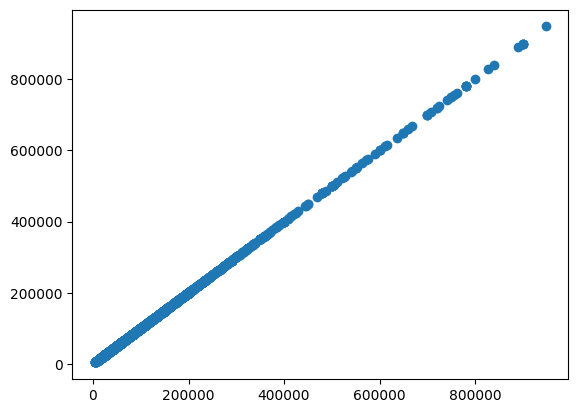

In [ ]:
plt.scatter(df['annual_income'], df['annual_income'])

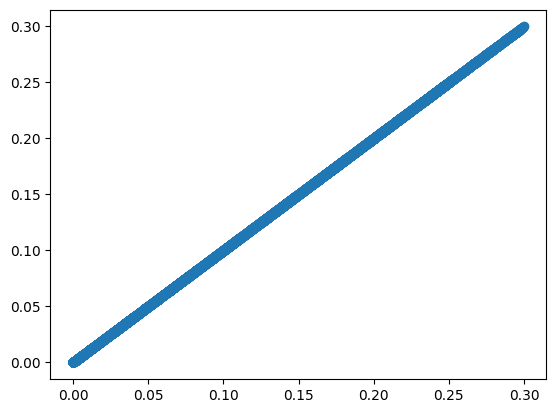

In [ ]:
plt.scatter(df['dti'], df['dti']);

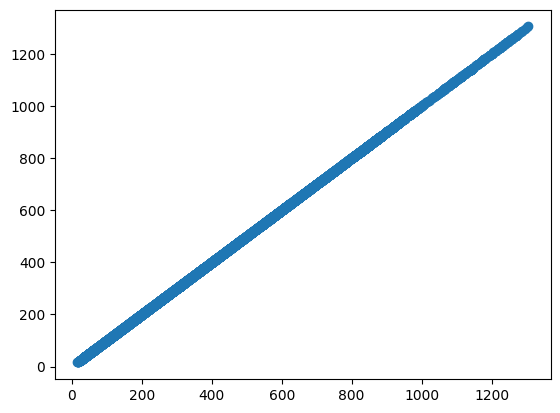

In [ ]:
plt.scatter(df['installment'], df['installment']);

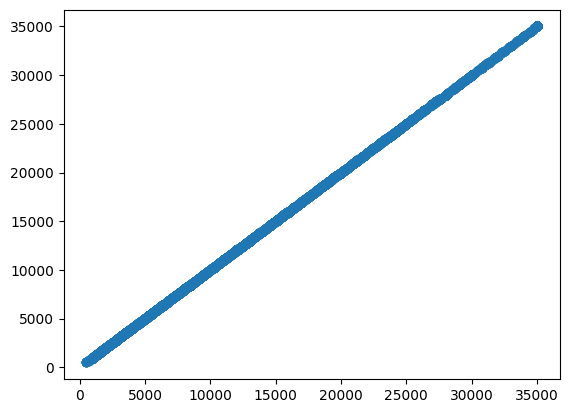

In [ ]:
plt.scatter(df['loan_amount'], df['loan_amount']);

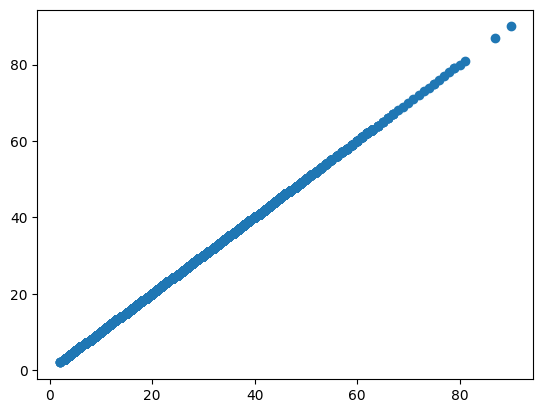

In [ ]:
plt.scatter(df['total_acc'], df['total_acc']);

### Exploratory Data Analysis

#### Univariate Exploration

I'll start by looking at the distribution of the numerical variables.

In [ ]:
#creating a function for the histogram plot
def histplot(data, x, bins, xlabel, ylabel, title, figsize:list=[8, 5]):
    """
    This function plots a histogram of the data it is given
    Arguments:
        data: Data frame
        x: variable of interest
        bins: specifies the bins to be used
        xlabel: label to be used on the x axis
        ylabel: label to be used on the y axis
        title: title of the plot
        figsize: tuple/list specifying the size of the figure
    """
    plt.figure(figsize=figsize)
    plt.hist(data=data, x=x, bins=bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

##### Annual Income

In [ ]:
df['annual_income'].describe()

count     38562.000000
mean      68976.661039
std       47536.741892
min        4000.000000
25%       41496.000000
50%       60000.000000
75%       83199.990000
max      948000.000000
Name: annual_income, dtype: float64

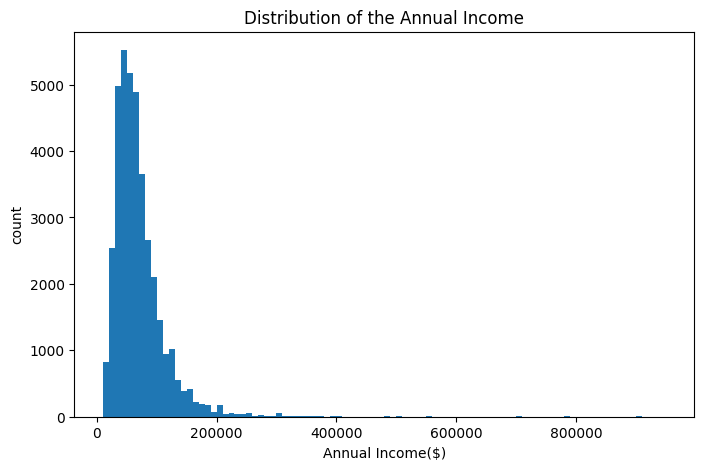

In [126]:
# start with a standard-scaled plot
bins = np.arange(10000, df.annual_income.max()+10000, 10000)

histplot (df, 'annual_income', bins, 'Annual Income($)', 'count', 'Distribution of the Annual Income')

Key Insights:

* Right-Skewed Distribution: The data is
heavily concentrated on the left side (lower income brackets), with a long tail extending to the right (higher income brackets). This indicates that the majority of loan applicants have lower annual incomes.
* The highest bars in the histogram are  in the lower income ranges, around \$40,000 to \$80,000, suggesting that a significant portion of the applicants fall within this income bracket.
* The tail extending to higher income values confirms the existence of individuals with much higher annual incomes, though they are less frequent.

##### DTI

In [ ]:
df['dti'].describe()

count    38562.000000
mean         0.133313
std          0.066634
min          0.000000
25%          0.082100
50%          0.134200
75%          0.185975
max          0.299900
Name: dti, dtype: float64

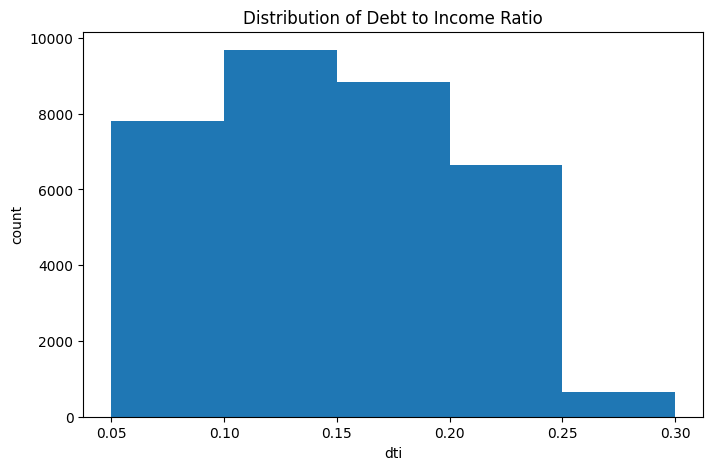

In [ ]:
bins = np.arange(0.05, df.dti.max()+0.05, 0.05)

histplot (df, 'dti', bins, 'dti', 'count', 'Distribution of Debt to Income Ratio')

Key Insights:

- DTI values range from a minimum of 0.00 to a maximum of 0.2999. This indicates that all applicants have a DTI below 30%, indicating strong financial health.
- Concentration: The majority of the DTI values are concentrated between 0.08 (25th percentile) and 0.18 (75th percentile). This means that 50% of the loan applicants have their DTI within this relatively narrow range.

##### Installment

In [ ]:
df['installment'].describe()

count    38562.000000
mean       326.882688
std        209.110332
min         15.690000
25%        168.450000
50%        283.045000
75%        434.587500
max       1305.190000
Name: installment, dtype: float64

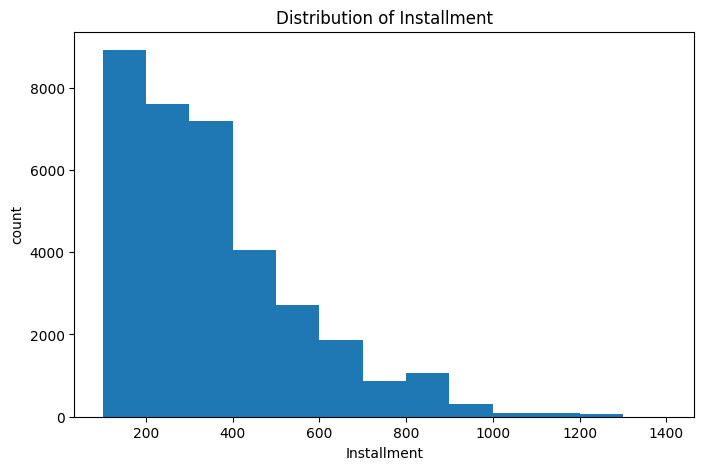

In [ ]:
bins = np.arange(100, df.installment.max()+100, 100)

histplot (df, 'installment', bins, 'Installment', 'count', 'Distribution of Installment')

Key Insight:
- The installment distribution shows a wide variety of monthly payment amounts, with a tendency for lower payments to be more common, and a diminishing number of loans as the installment amount increases.

##### Interest Rate

In [ ]:
df['int_rate'].describe()

count    38562.000000
mean         0.120495
std          0.037165
min          0.054200
25%          0.093200
50%          0.118600
75%          0.145900
max          0.245900
Name: int_rate, dtype: float64

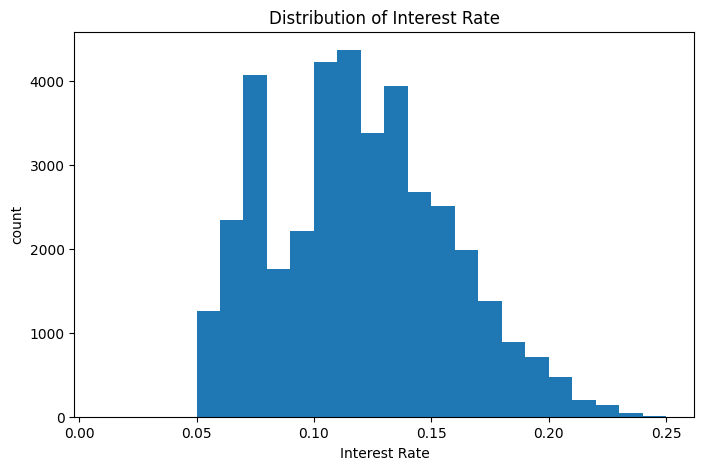

In [ ]:
bins = np.arange(0.01, df.int_rate.max()+0.01, 0.01)

histplot (df, 'int_rate', bins, 'Interest Rate', 'count', 'Distribution of Interest Rate')

Key Insights:
- The majority of interest rates fall between 9.32% (25th percentile) and 14.59% (75th percentile), indicating that a significant portion of loans are issued within this range.
- The histogram for int_rate shows a somewhat bimodal distribution, often reflecting different risk tiers or loan product offerings, but generally concentrated within the mid-range of rates.

##### Loan Amount

In [ ]:
df['loan_amount'].describe()

count    38562.000000
mean     11296.333826
std       7460.938712
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amount, dtype: float64

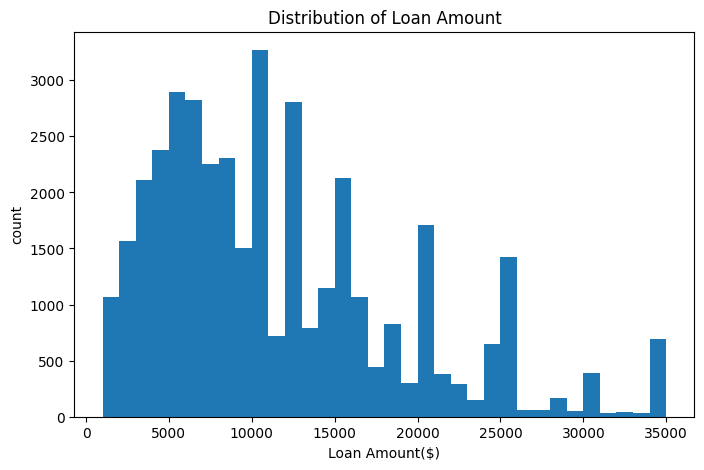

In [ ]:
bins = np.arange(1000, df.loan_amount.max()+1000, 1000)

histplot (df, 'loan_amount', bins, 'Loan Amount($)', 'count', 'Distribution of Loan Amount')

In [ ]:
np.log10(df.loan_amount.describe())

count    4.586160
mean     4.052938
std      3.872793
min      2.698970
25%      3.740363
50%      4.000000
75%      4.176091
max      4.544068
Name: loan_amount, dtype: float64

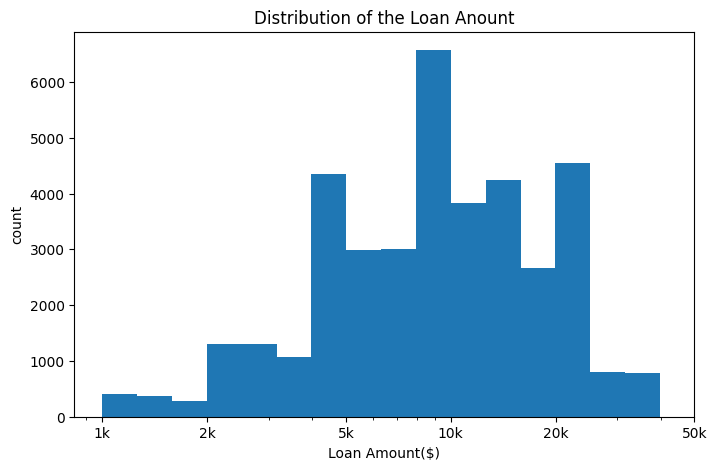

In [ ]:
bins = 10 ** np.arange(3.0, np.log10(df.loan_amount.max())+0.1, 0.1)

histplot (df, 'loan_amount', bins, 'Loan Amount($)', 'count', 'Distribution of the Loan Anount')
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k', '5k', '10k', '20k', '50k']);


Key Insights:
- 50% of the loans are between \$5,500 (25th percentile) and \$15,000 (75th percentile).
- The initial histogram showed some peaks, often at round numbers like \$5,000, \$10,000, \$15,000, etc., as these are common loan increments. After applying a log transformation and replotting, the distribution appears more uniform, which helps visualize the spread across different orders of magnitude.

##### Total Credit Accounts

In [ ]:
df['total_acc'].describe()

count    38562.000000
mean        22.131840
std         11.392848
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

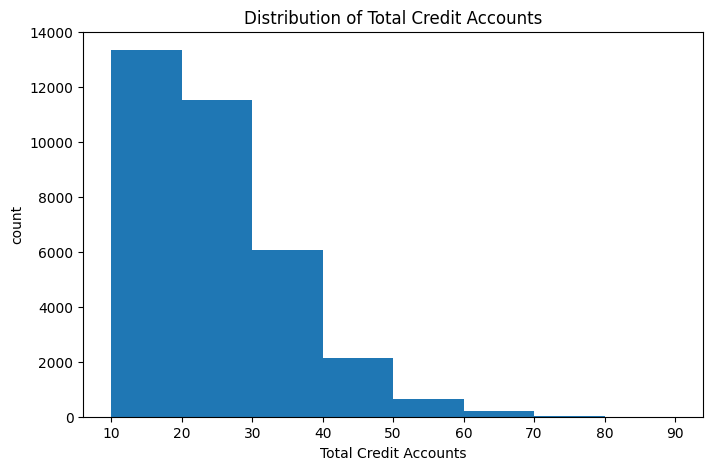

In [ ]:
bins = np.arange(10, df.total_acc.max()+10, 10)

histplot (df, 'total_acc', bins, 'Total Credit Accounts', 'count', 'Distribution of Total Credit Accounts')

Key Insight:
- The histogram for total_acc typically shows a right-skewed distribution, with a higher frequency of applicants having fewer credit accounts, and fewer applicants having a very large number of accounts.

##### Total Payment

In [ ]:
df['total_payment'].describe()

count    38562.000000
mean     12263.500207
std       9051.553835
min         34.000000
25%       5633.000000
50%      10041.500000
75%      16658.000000
max      58564.000000
Name: total_payment, dtype: float64

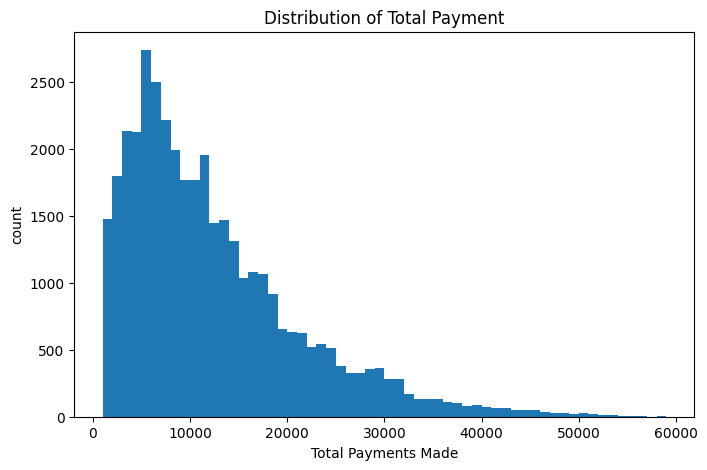

In [ ]:
bins = np.arange(1000, df.total_payment.max()+1000, 1000)

histplot (df, 'total_payment', bins, 'Total Payments Made', 'count', 'Distribution of Total Payment')

Key Insights:
- 50% of the total payments are between \$5,633 (25th percentile) and \$16,658 (75th percentile).
- Similar to annual_income and loan_amount, the histogram for total_payment is right-skewed, indicating that a larger number of loans result in smaller total payments, and fewer loans have very large total payments, consistent with the distribution of loan amounts.

Looking at categorical Variables

In [ ]:
def barchart(data, xlabel, ylabel, title, color, x=None, y=None, figsize:list=[8, 5]):
    """
    This function plots a barchart of the data it is given
    Arguments:
        data: Data frame
        x: variable of interest plotted horizontally
        y: variable of interest plotted vertically
        xlabel: label to be used on the x axis
        ylabel: label to be used on the y axis
        title: title of the plot
        color: color to be applied on the bars
        figsize: tuple/list specifying the size of the figure
    """
    plt.figure(figsize=figsize)
    sns.countplot(data=data, x=x, y=y, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

##### Address State

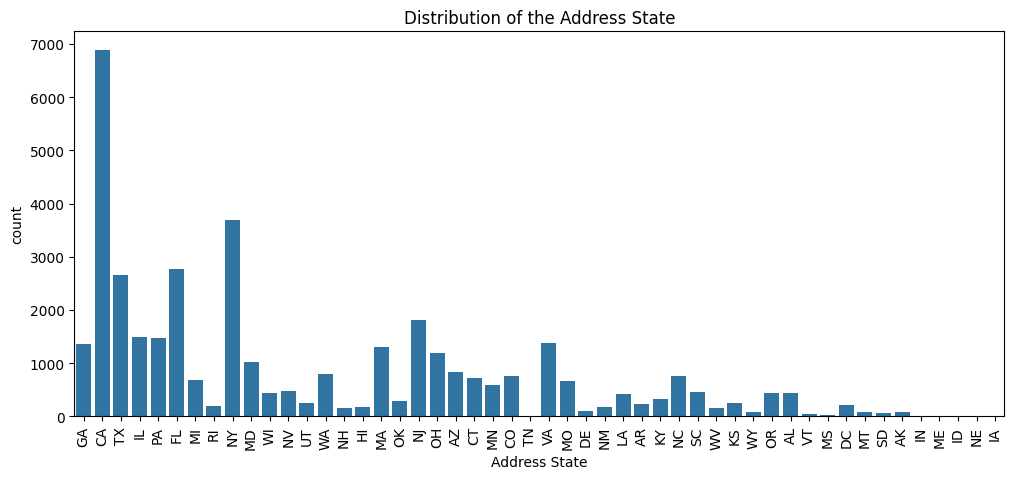

In [ ]:
base_color = sns.color_palette()[0]

barchart(df, 'Address State', 'count', 'Distribution of the Address State', base_color, figsize=[12, 5], x='address_state')
plt.xticks(rotation=90);

Key Insights:
- There are 50 unique address states, indicating a wide geographic spread of applicants across the USA.
- The bar chart shows that California (CA) has the highest number of loan applicants by a significant margin, followed by states like New York (NY) and Texas (TX). This suggests that a large portion of the lending activity is concentrated in a few key states.

##### Employment Length

In [ ]:
df['emp_length'].unique()

array(['< 1 year', '9 years', '4 years', '10+ years', '3 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [ ]:
#Ordering the Employment Length column
emp_l_classes = ['10+ years', '9 years', '8 years', '7 years', '6 years',
       '5 years', '4 years', '3 years', '2 years', '1 year', '< 1 year']

emp_classes = pd.api.types.CategoricalDtype(ordered=True, categories=emp_l_classes)
df['emp_length'] = df['emp_length'].astype(emp_classes)

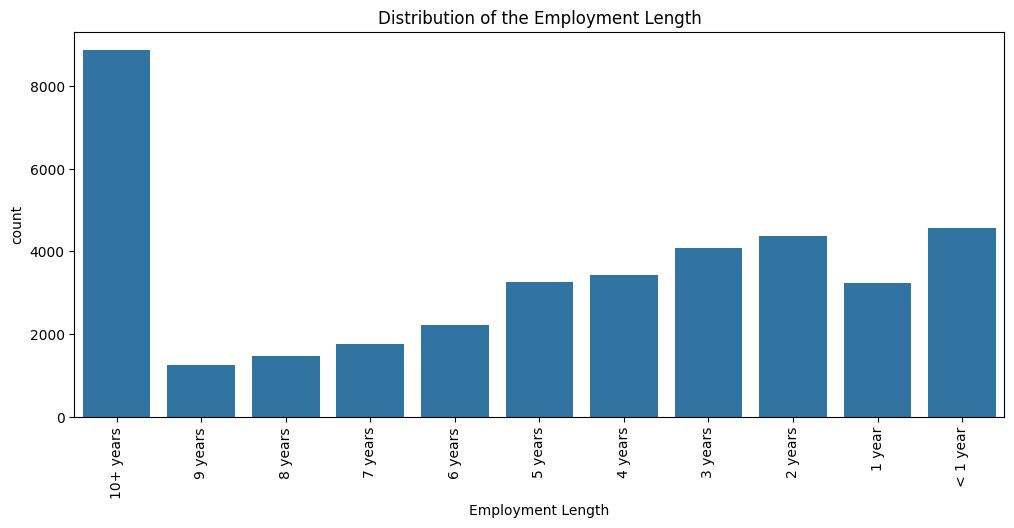

In [ ]:
base_color = sns.color_palette()[0]

barchart(df, 'Employment Length', 'count', 'Distribution of the Employment Length', base_color, figsize=[12, 5], x='emp_length')
plt.xticks(rotation=90);

Key Insight:
- The most frequent employment length is '10+ years', which accounts for a substantial portion of the applicants. This is followed by '2 years' and '3 years', with '< 1 year' being the least common.
- A significant number of applicants have long employment histories, which indicates job stability and is viewed favorably by lenders.

##### Grade

In [ ]:
df['grade'].unique()

array(['C', 'E', 'B', 'A', 'D', 'F', 'G'], dtype=object)

In [ ]:
grade_classes = sorted(df['grade'].unique())

In [ ]:
g_classes = pd.api.types.CategoricalDtype(ordered=True, categories=grade_classes)

In [133]:
df['grade'] = df['grade'].astype(g_classes)

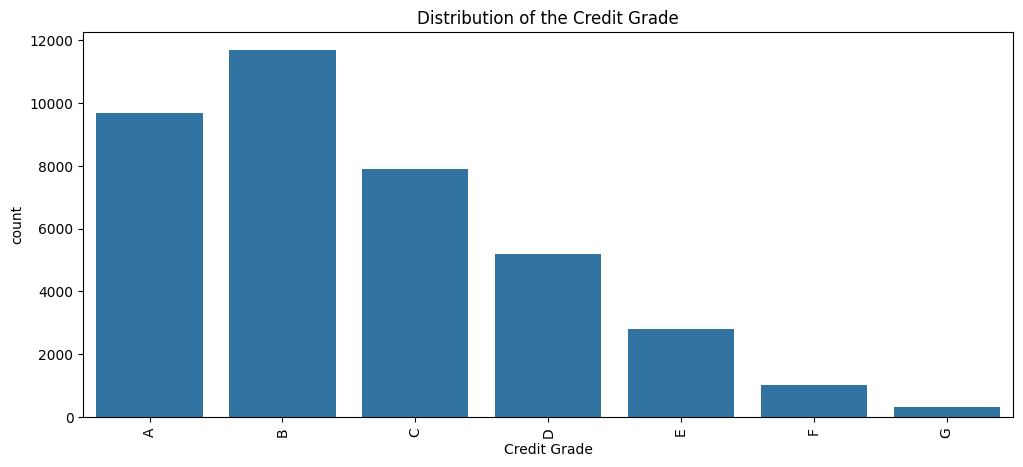

In [ ]:
base_color = sns.color_palette()[0]

barchart(df, 'Credit Grade', 'count', 'Distribution of the Credit Grade', base_color, figsize=[12, 5], x='grade')
plt.xticks(rotation=90);

Key Insights:
- The grade column represents the assigned credit grade, ordered from 'A' (best) to 'G' (worst).
- Grades 'B' and 'C' are the most prevalent, followed by 'A'. Grades 'F' and 'G' are relatively rare.

##### SubGrade

In [129]:
df['sub_grade'].unique()

array(['C4', 'E1', 'C5', 'B2', 'A1', 'C3', 'C2', 'A4', 'A5', 'B5', 'B4',
       'B3', 'B1', 'D1', 'A2', 'A3', 'D4', 'D2', 'C1', 'D3', 'E3', 'F1',
       'E2', 'E5', 'D5', 'E4', 'F2', 'G3', 'F3', 'G1', 'F4', 'G4', 'G2',
       'F5', 'G5'], dtype=object)

In [ ]:
subgrade_classes = sorted(df['sub_grade'].unique())

In [131]:
subg_classes = pd.api.types.CategoricalDtype(ordered=True, categories=subgrade_classes)

In [134]:
df['sub_grade'] = df['sub_grade'].astype(subg_classes)

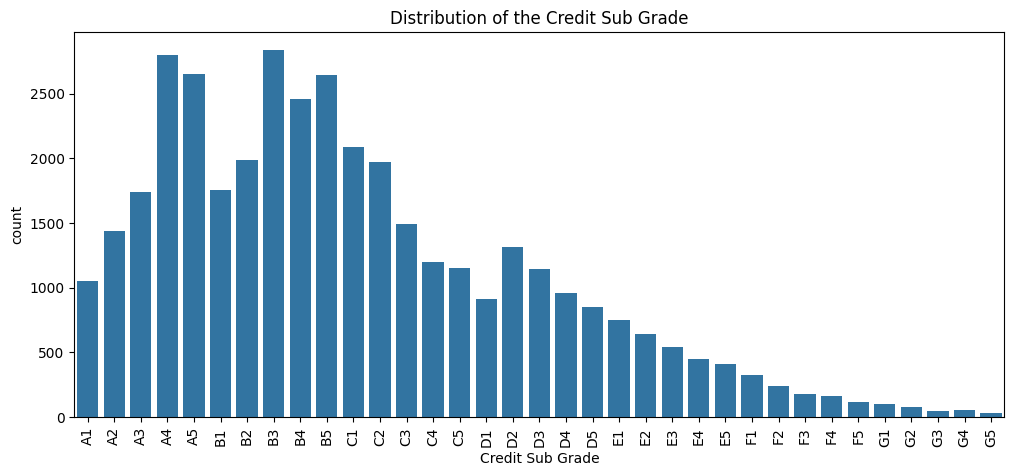

In [135]:
base_color = sns.color_palette()[0]

barchart(df, 'Credit Sub Grade', 'count', 'Distribution of the Credit Sub Grade', base_color, figsize=[12, 5], x='sub_grade')
plt.xticks(rotation=90);

##### Home Ownership

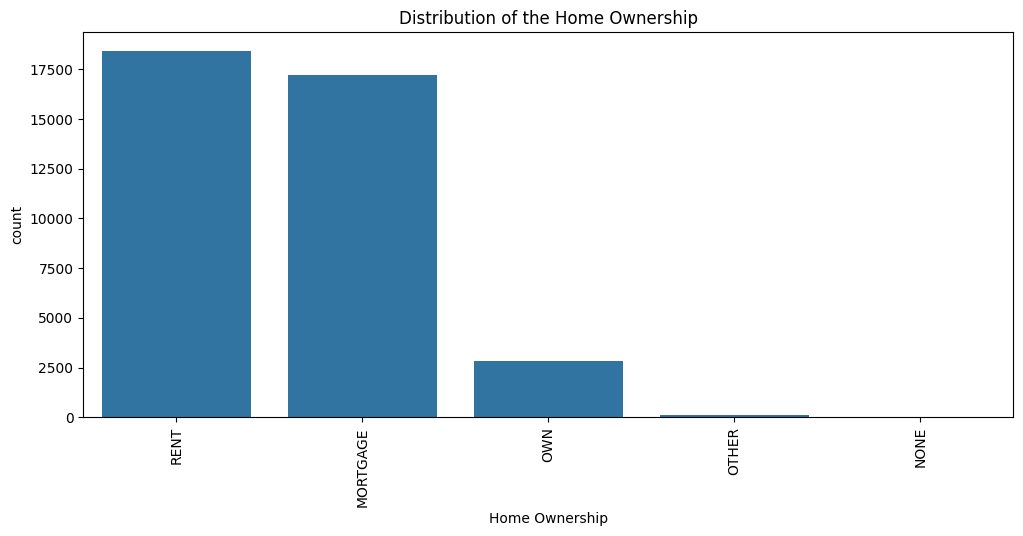

In [ ]:
base_color = sns.color_palette()[0]

barchart(df, 'Home Ownership', 'count', 'Distribution of the Home Ownership', base_color, figsize=[12, 5], x='home_ownership')
plt.xticks(rotation=90);

Key Insight:
- 'RENT' and 'MORTGAGE' are the overwhelming majority, indicating that most applicants either rent their living space or are homeowners with an existing mortgage.

##### Purpose

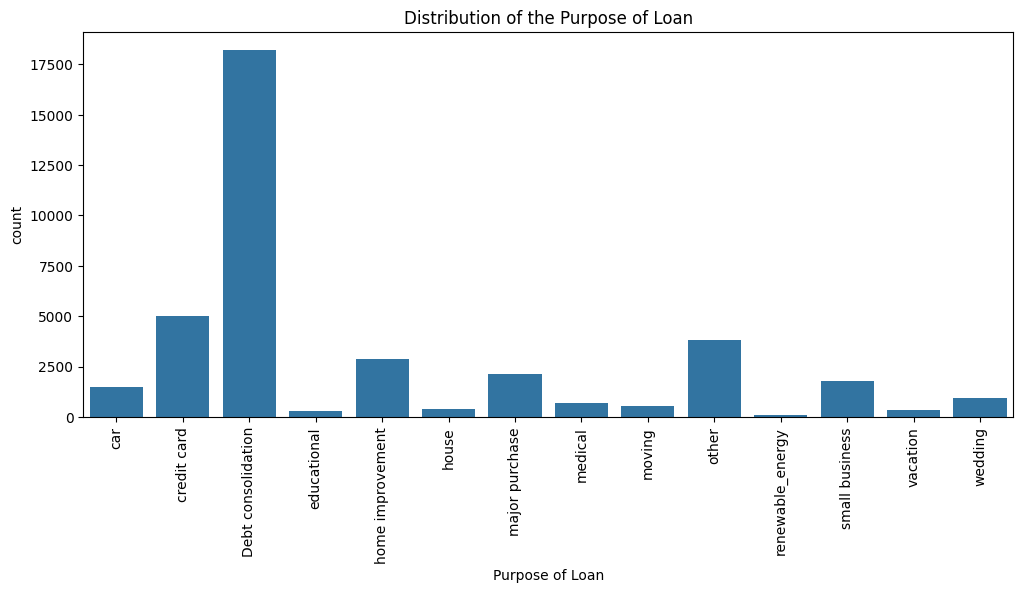

In [ ]:
base_color = sns.color_palette()[0]

barchart(df, 'Purpose of Loan', 'count', 'Distribution of the Purpose of Loan', base_color, figsize=[12, 5], x='purpose')
plt.xticks(rotation=90);

Key Insight:
- Debt consolidation is the most common loan purpose, representing a huge proportion of the loans. This is followed by 'credit card' and 'other'. Other purposes like 'car', 'small business', or 'educational' are much less frequent.
- The primary driver for these loans appears to be managing and consolidating existing debts.

##### Term

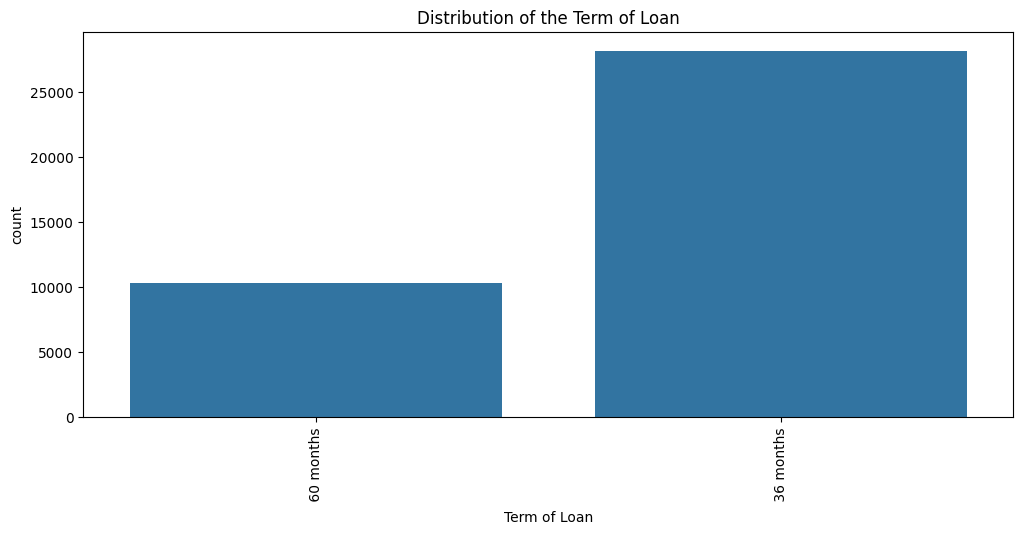

In [ ]:
base_color = sns.color_palette()[0]

barchart(df, 'Term of Loan', 'count', 'Distribution of the Term of Loan', base_color, figsize=[12, 5], x='term')
plt.xticks(rotation=90);

Key Insight:
- '36 months' loans are significantly more common than '60 months' loans.
- Shorter loan terms are preferred or more frequently approved, which typically implies lower overall risk and faster repayment for lenders.

##### Verification Status

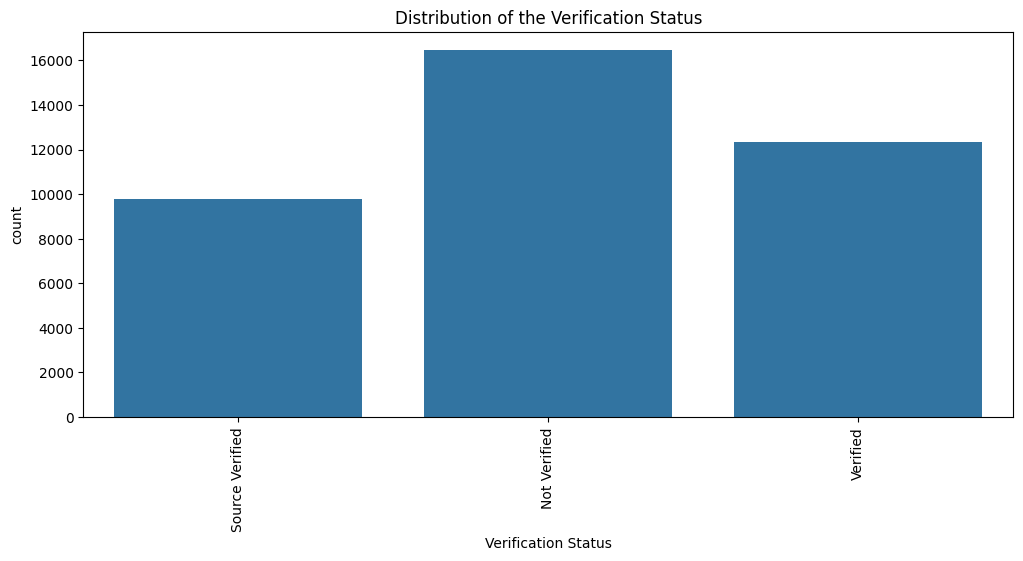

In [ ]:
base_color = sns.color_palette()[0]

barchart(df, 'Verification Status', 'count', 'Distribution of the Verification Status', base_color, figsize=[12, 5], x='verification_status')
plt.xticks(rotation=90);

Key Insights:
- 'Not Verified' and 'Source Verified' are the most common statuses, with 'Verified' being less frequent.
- A substantial portion of the applicants' income information is either not formally verified or is verified through a 'source' rather than a full, direct 'verification'. This can have implications for the risk assessment model.

###### Loan Status

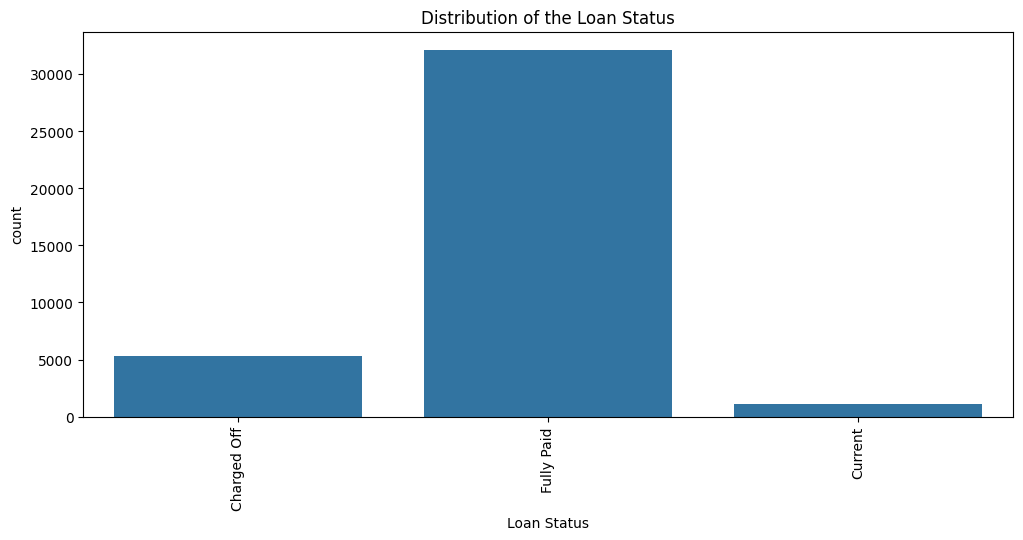

In [ ]:
base_color = sns.color_palette()[0]

barchart(df, 'Loan Status', 'count', 'Distribution of the Loan Status', base_color, figsize=[12, 5], x='loan_status')
plt.xticks(rotation=90);

Key Insight:
- 'Fully Paid' is the most common status, indicating successful repayment for the majority of loans. 'Charged Off' (defaults) is the next most frequent, followed by 'Current' (loans still active and being paid).

### Bi-variate Exploration

In [ ]:
numerical_variables = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_variables = df.select_dtypes(include=['object']).columns.tolist()
categorical_variables.remove('id')
categorical_variables.remove('member_id')

In [ ]:
print("Numerical Variables:", numerical_variables)
print("Categorical Variables:", categorical_variables)

Numerical Variables: ['annual_income', 'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc', 'total_payment']
Categorical Variables: ['address_state', 'application_type', 'emp_title', 'home_ownership', 'loan_status', 'purpose', 'sub_grade', 'term', 'verification_status']


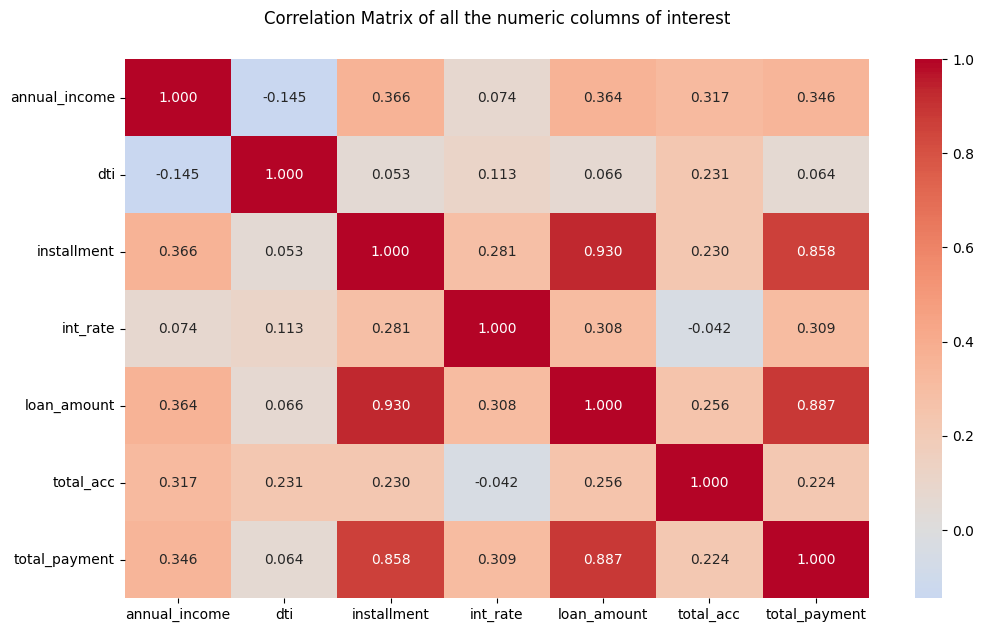

In [ ]:
# correlation plot
plt.figure(figsize = [12, 7])
sns.heatmap(df[numerical_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'coolwarm', center = 0)
plt.title('Correlation Matrix of all the numeric columns of interest', y=1.05);

Key Relationships:

- **loan_amount** and **installment**: These columns have a strong positive Correlation. This is expected because a higher loan amount naturally leads to a higher monthly installment payment to repay that loan.
- **loan_amount** and **total_payment**: The total amount paid over the life of a loan will be strongly positively correlated with the initial loan amount. A larger loan will generally result in a larger total payment.
- **annual_income** and **loan_amount** (Moderate Positive Correlation): People with higher annual incomes are often approved for larger loan amounts, as they are perceived to have a greater capacity for repayment.

data_samp.shape= (38562, 24)


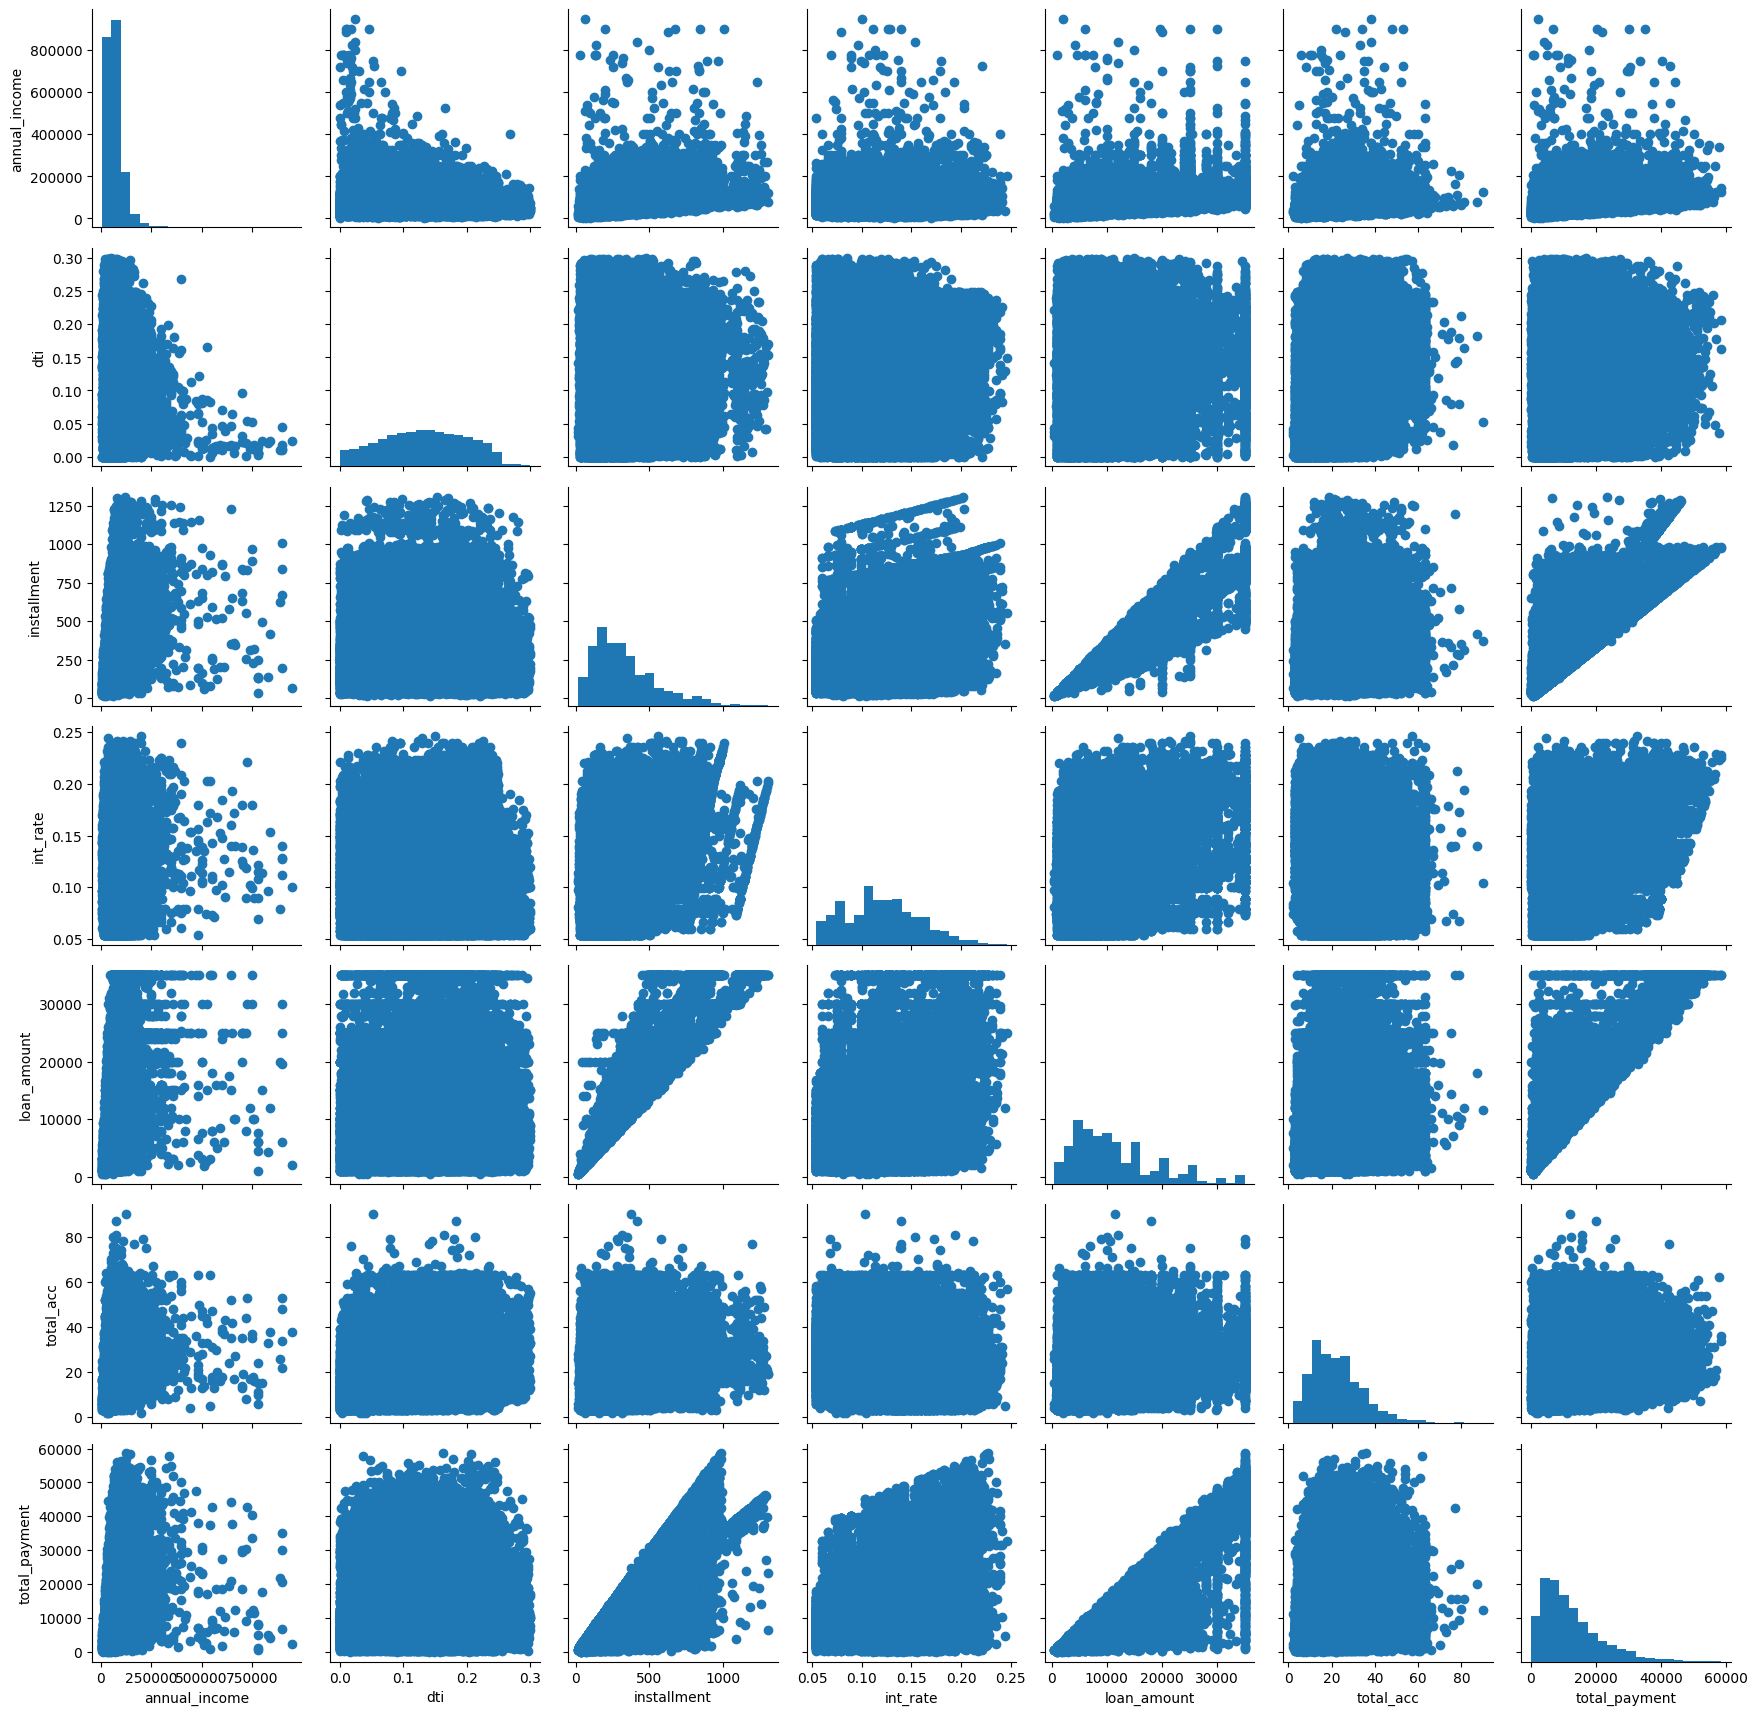

In [ ]:
print("data_samp.shape=",df.shape)

g = sns.PairGrid(data = df, vars = numerical_variables)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);


Key Insight:
The plot confirms the findings from the heatmap with a few additions.
- dti vs. other variables: dti generally shows weak or no strong linear patterns with other numerical variables. The points are often widely scattered, indicating that DTI doesn't directly increase or decrease in a linear fashion with these other metrics.
- total_acc vs. other variables: total_acc also tends to have weak linear relationships. Having more credit accounts doesn't strongly predict income, loan amount, or DTI in a simple linear way.

Conclusion: From the bivariate analysis between the numerical columns, I will drop the highly correlated columns in the feature engineering notebook.
- installment
- total_payment

##### Loan status correlation with the numerical variables of interest.

In [ ]:
df.loan_status.value_counts()

loan_status
Fully Paid     32132
Charged Off     5332
Current         1098
Name: count, dtype: int64

In [ ]:
important_num_var = ['annual_income', 'dti', 'int_rate', 'loan_amount']

In [90]:
# creating a function for our box grid.
def boxgrid(data, x, y:list, nrows, ncols, figsize=[25, 15]):
    """
    Plots a grid of boxplots showing distribution between a categorical variable and a set of numerical variables.
    No of rows and cols should make up len of the numerical variables list.
    Arguments:
        data: data frame to use
        x: categorical variable
        y: list of numerical variables
        nrows: no of rows to be plotted
        ncols: no of columns to be plotted
        figsize: size of the figure
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    fig.tight_layout(h_pad=5)
    axes = axes.flatten()

    default_color = sns.color_palette()[0]
    index = 0
    r = ncols*nrows
    for i in range(r):
        g = sns.boxplot(data=data, x=x, y=y[index], color=default_color, ax=axes[i])
        g.tick_params(axis='x', labelrotation = 15);
        index += 1

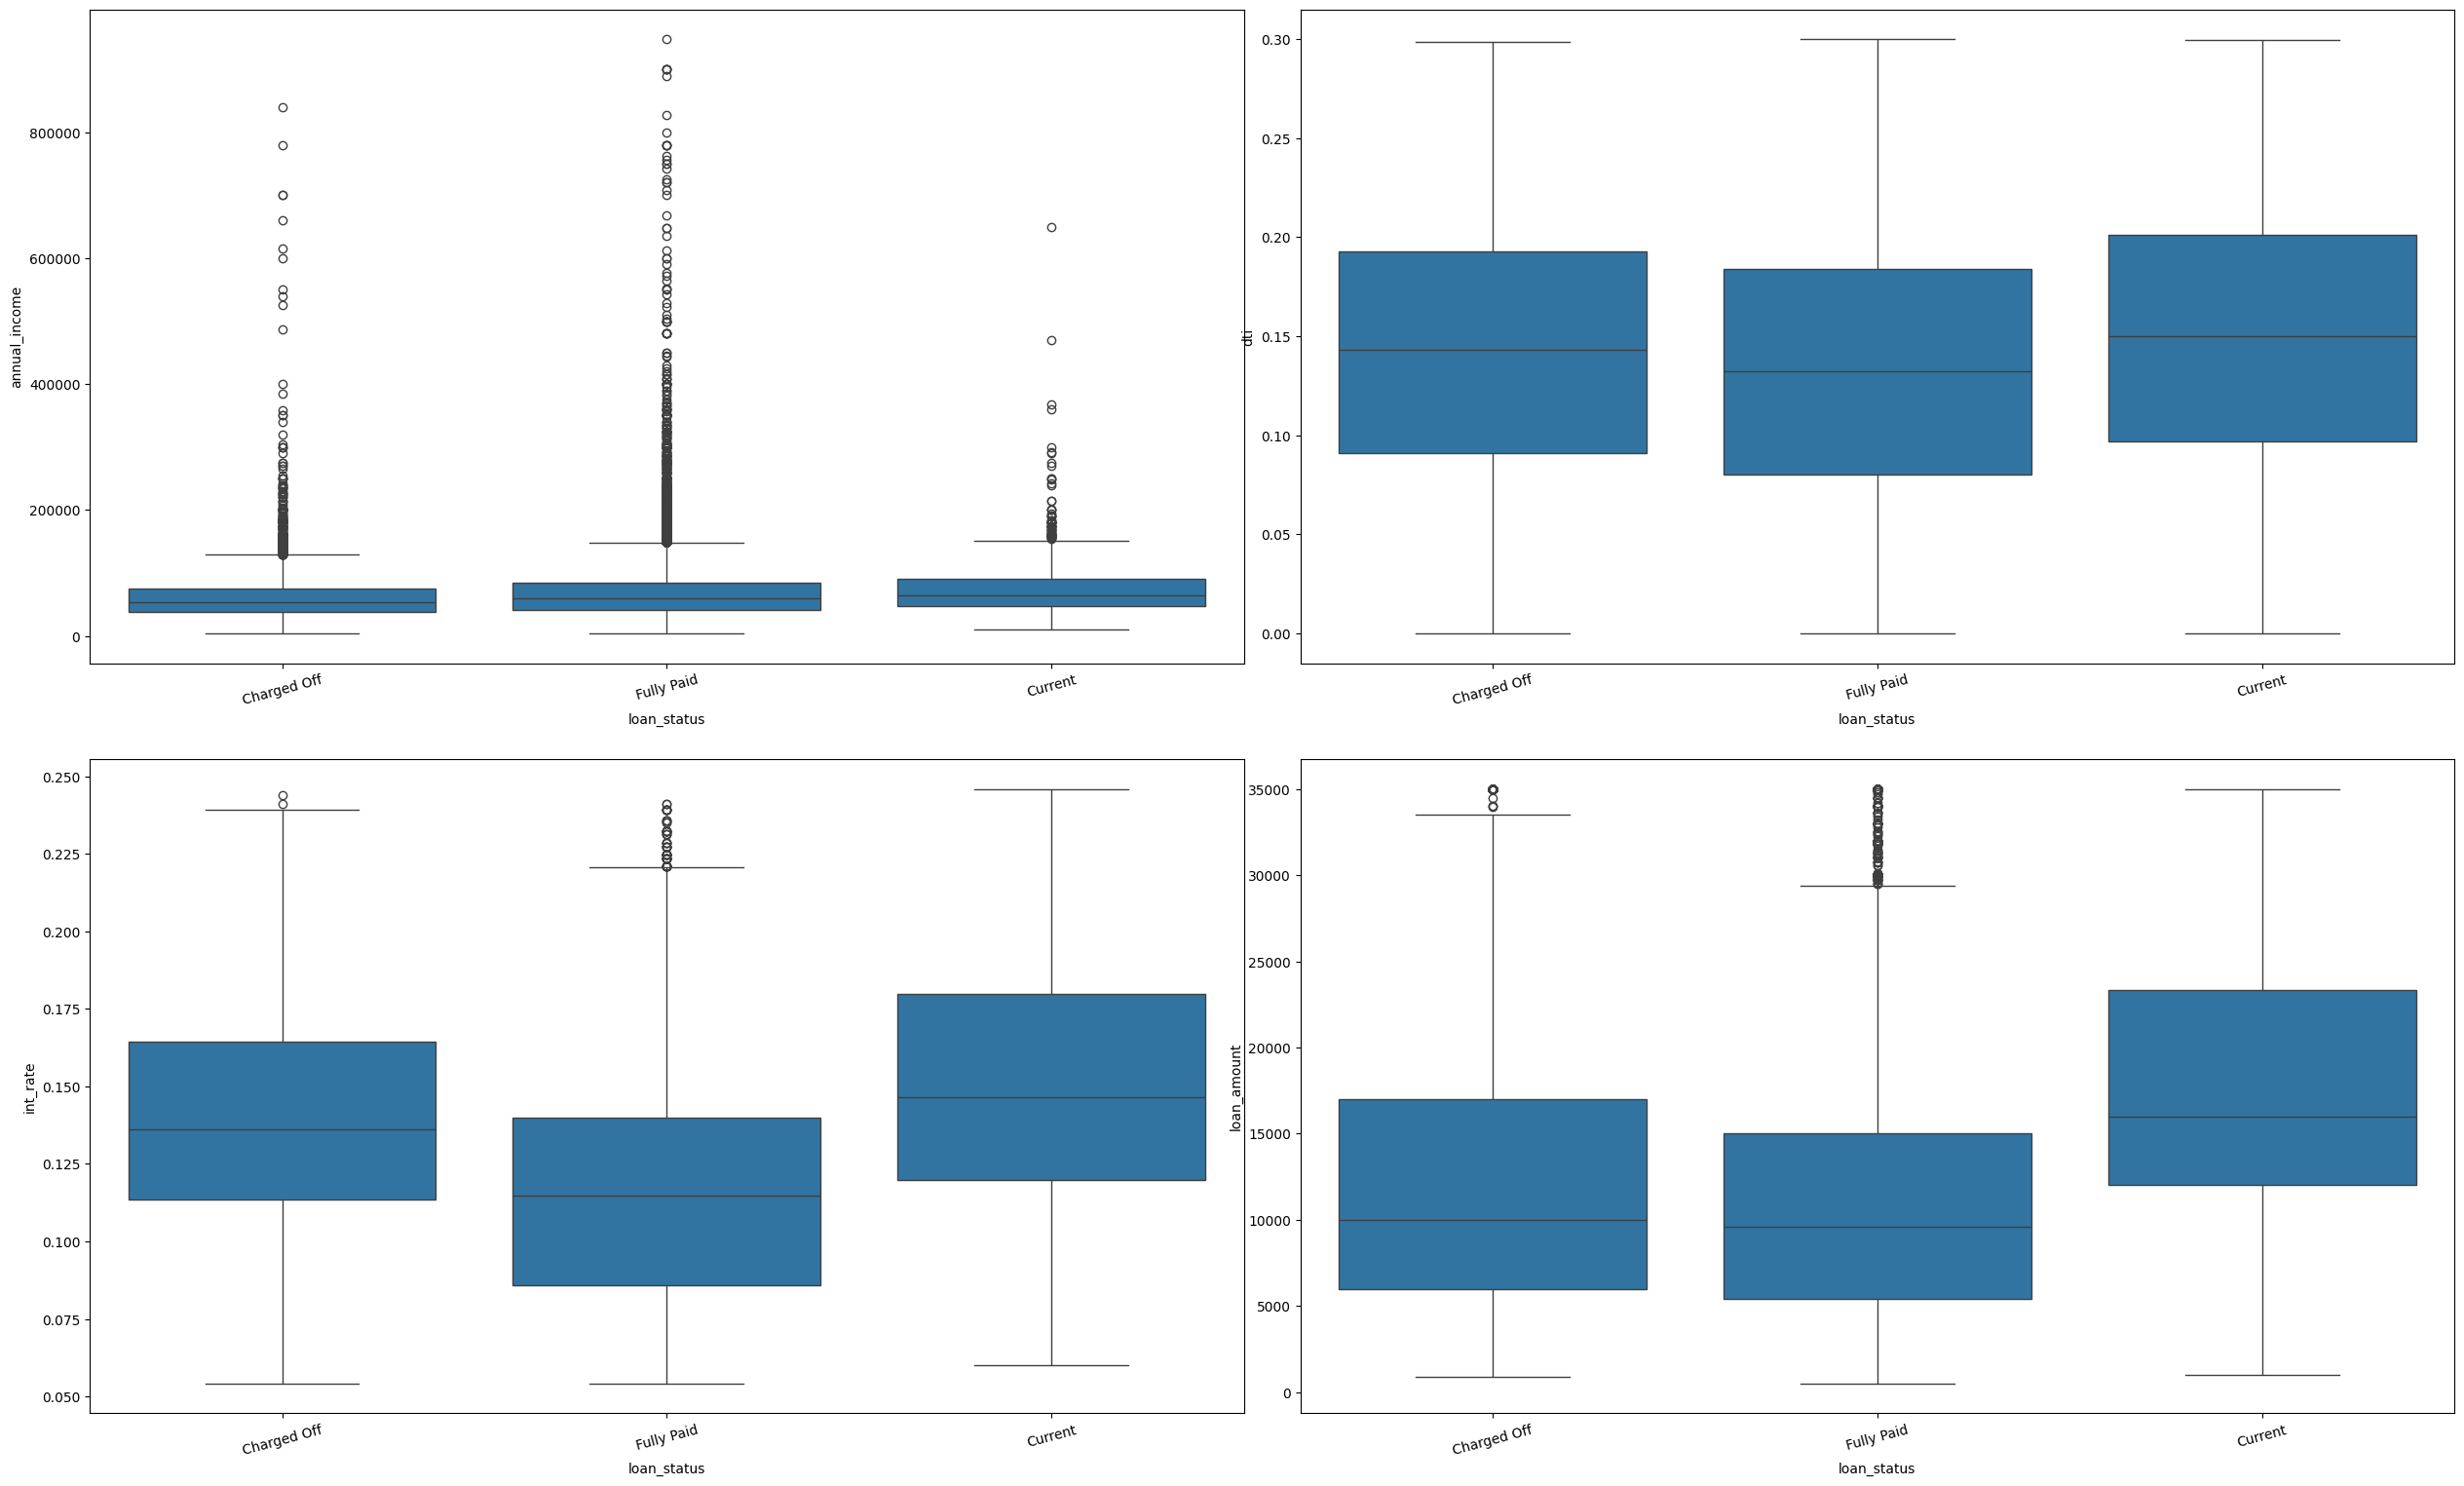

In [91]:
# plot matrix of numeric features against categorical feature - Loan Status.
boxgrid(df, 'loan_status', important_num_var, nrows=2, ncols=2)

Key Insights:

**Interest Rate vs. Loan Status**
- Charged Off Loans: These loans tend to have a higher median interest rate compared to 'Fully Paid' and 'Current' loans. This suggests that loans with higher interest rates might be associated with a greater risk of default, or borrowers with higher interest rates are more likely to struggle with repayments, leading to a 'Charged Off' status.
- Fully Paid Loans: These loans generally exhibit lower median interest rates. This indicates that borrowers with more favorable (lower) interest rates are more likely to successfully repay their loans in full.
- Current Loans: The distribution of interest rates for 'Current' loans falls somewhere between 'Charged Off' and 'Fully Paid' loans, closer to 'Fully Paid' in terms of median, as these loans are still actively being paid off. The spread for current loans might also reflect the diverse range of active loans.

In summary, there is a clear trend indicating that higher interest rates are correlated with a higher likelihood of a loan being 'Charged Off', while lower interest rates are more associated with 'Fully Paid' loans.

**Annual Income vs. Loan Status**
- Fully Paid: Borrowers who successfully fully paid their loans tend to have a higher median annual income, and the distribution is generally centered around higher income brackets.
- Charged Off: Loans that were charged off appear to be associated with borrowers having lower median annual incomes, and the distribution is often shifted towards the lower end.
- Current: The annual income distribution for current loans is somewhere in between 'Fully Paid' and 'Charged Off', these are still active loans from a mix of borrowers.

Insight: Higher annual income appears to be positively correlated with the likelihood of a loan being fully paid, suggesting that borrowers with greater financial capacity are more likely to meet their repayment obligations.

**DTI (Debt-to-Income Ratio) vs. Loan Status**
- Fully Paid: Borrowers with fully paid loans often have lower DTI ratios, indicating they have less debt relative to their income.
- Charged Off: Conversely, charged-off loans  show higher median DTI ratios, suggesting that a higher debt burden relative to income could contribute to repayment difficulties and eventual default.
- Current: DTI for current loans are intermediate, reflecting that these loans are ongoing and their outcomes are yet to be determined, but they are currently being managed.

Insight: A lower DTI ratio is associated with a higher probability of a loan being fully repaid, as it indicates better financial health and less strain on a borrower's ability to service debt.

**Loan Amount vs. Loan Status**
- Fully Paid: Fully paid loans have the median loan amounts lower compared to other statuses, as smaller loans might be easier to repay.
- Charged Off: Charged-off loans show a distribution where both smaller and larger loan amounts are present.
- Current: Current loans will also cover a spectrum of loan amounts, reflecting the diverse pool of active loans.

Insight: While loan amount itself doesn't show as strong a direct predictive relationship with loan_status as income or DTI, it's an important factor when combined with other variables. Very large loans might present higher risk if the borrower's financial capacity isn't sufficiently high.



##### Loan Amount correlation with the categorical variables of interest.

In [97]:
cat_var = ['emp_length', 'home_ownership', 'purpose',
           'sub_grade', 'term', 'verification_status']

In [92]:
 # creating a function for our violin grid.
def violingrid(data, x:list, y, nrows, ncols, figsize=[25, 15]):
    """
    Plots a grid of violinplots showing distribution between a numerical variable and a set of categorical variables.
    No of rows and cols should make up len of the numerical variables list.
    Arguments:
        data: data frame to use
        x: list of categorical variables
        y: numerical variable
        nrows: no of rows to be plotted
        ncols: no of columns to be plotted
        figsize: size of the figure
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    fig.tight_layout(h_pad=5)
    axes = axes.flatten()

    default_color = sns.color_palette()[0]
    index = 0
    r = ncols*nrows
    for i in range(r):
        g = sns.violinplot(data=data, x=x[index], y=y, color=default_color, ax=axes[i])
        g.tick_params(axis='x', labelrotation = 15);
        index += 1

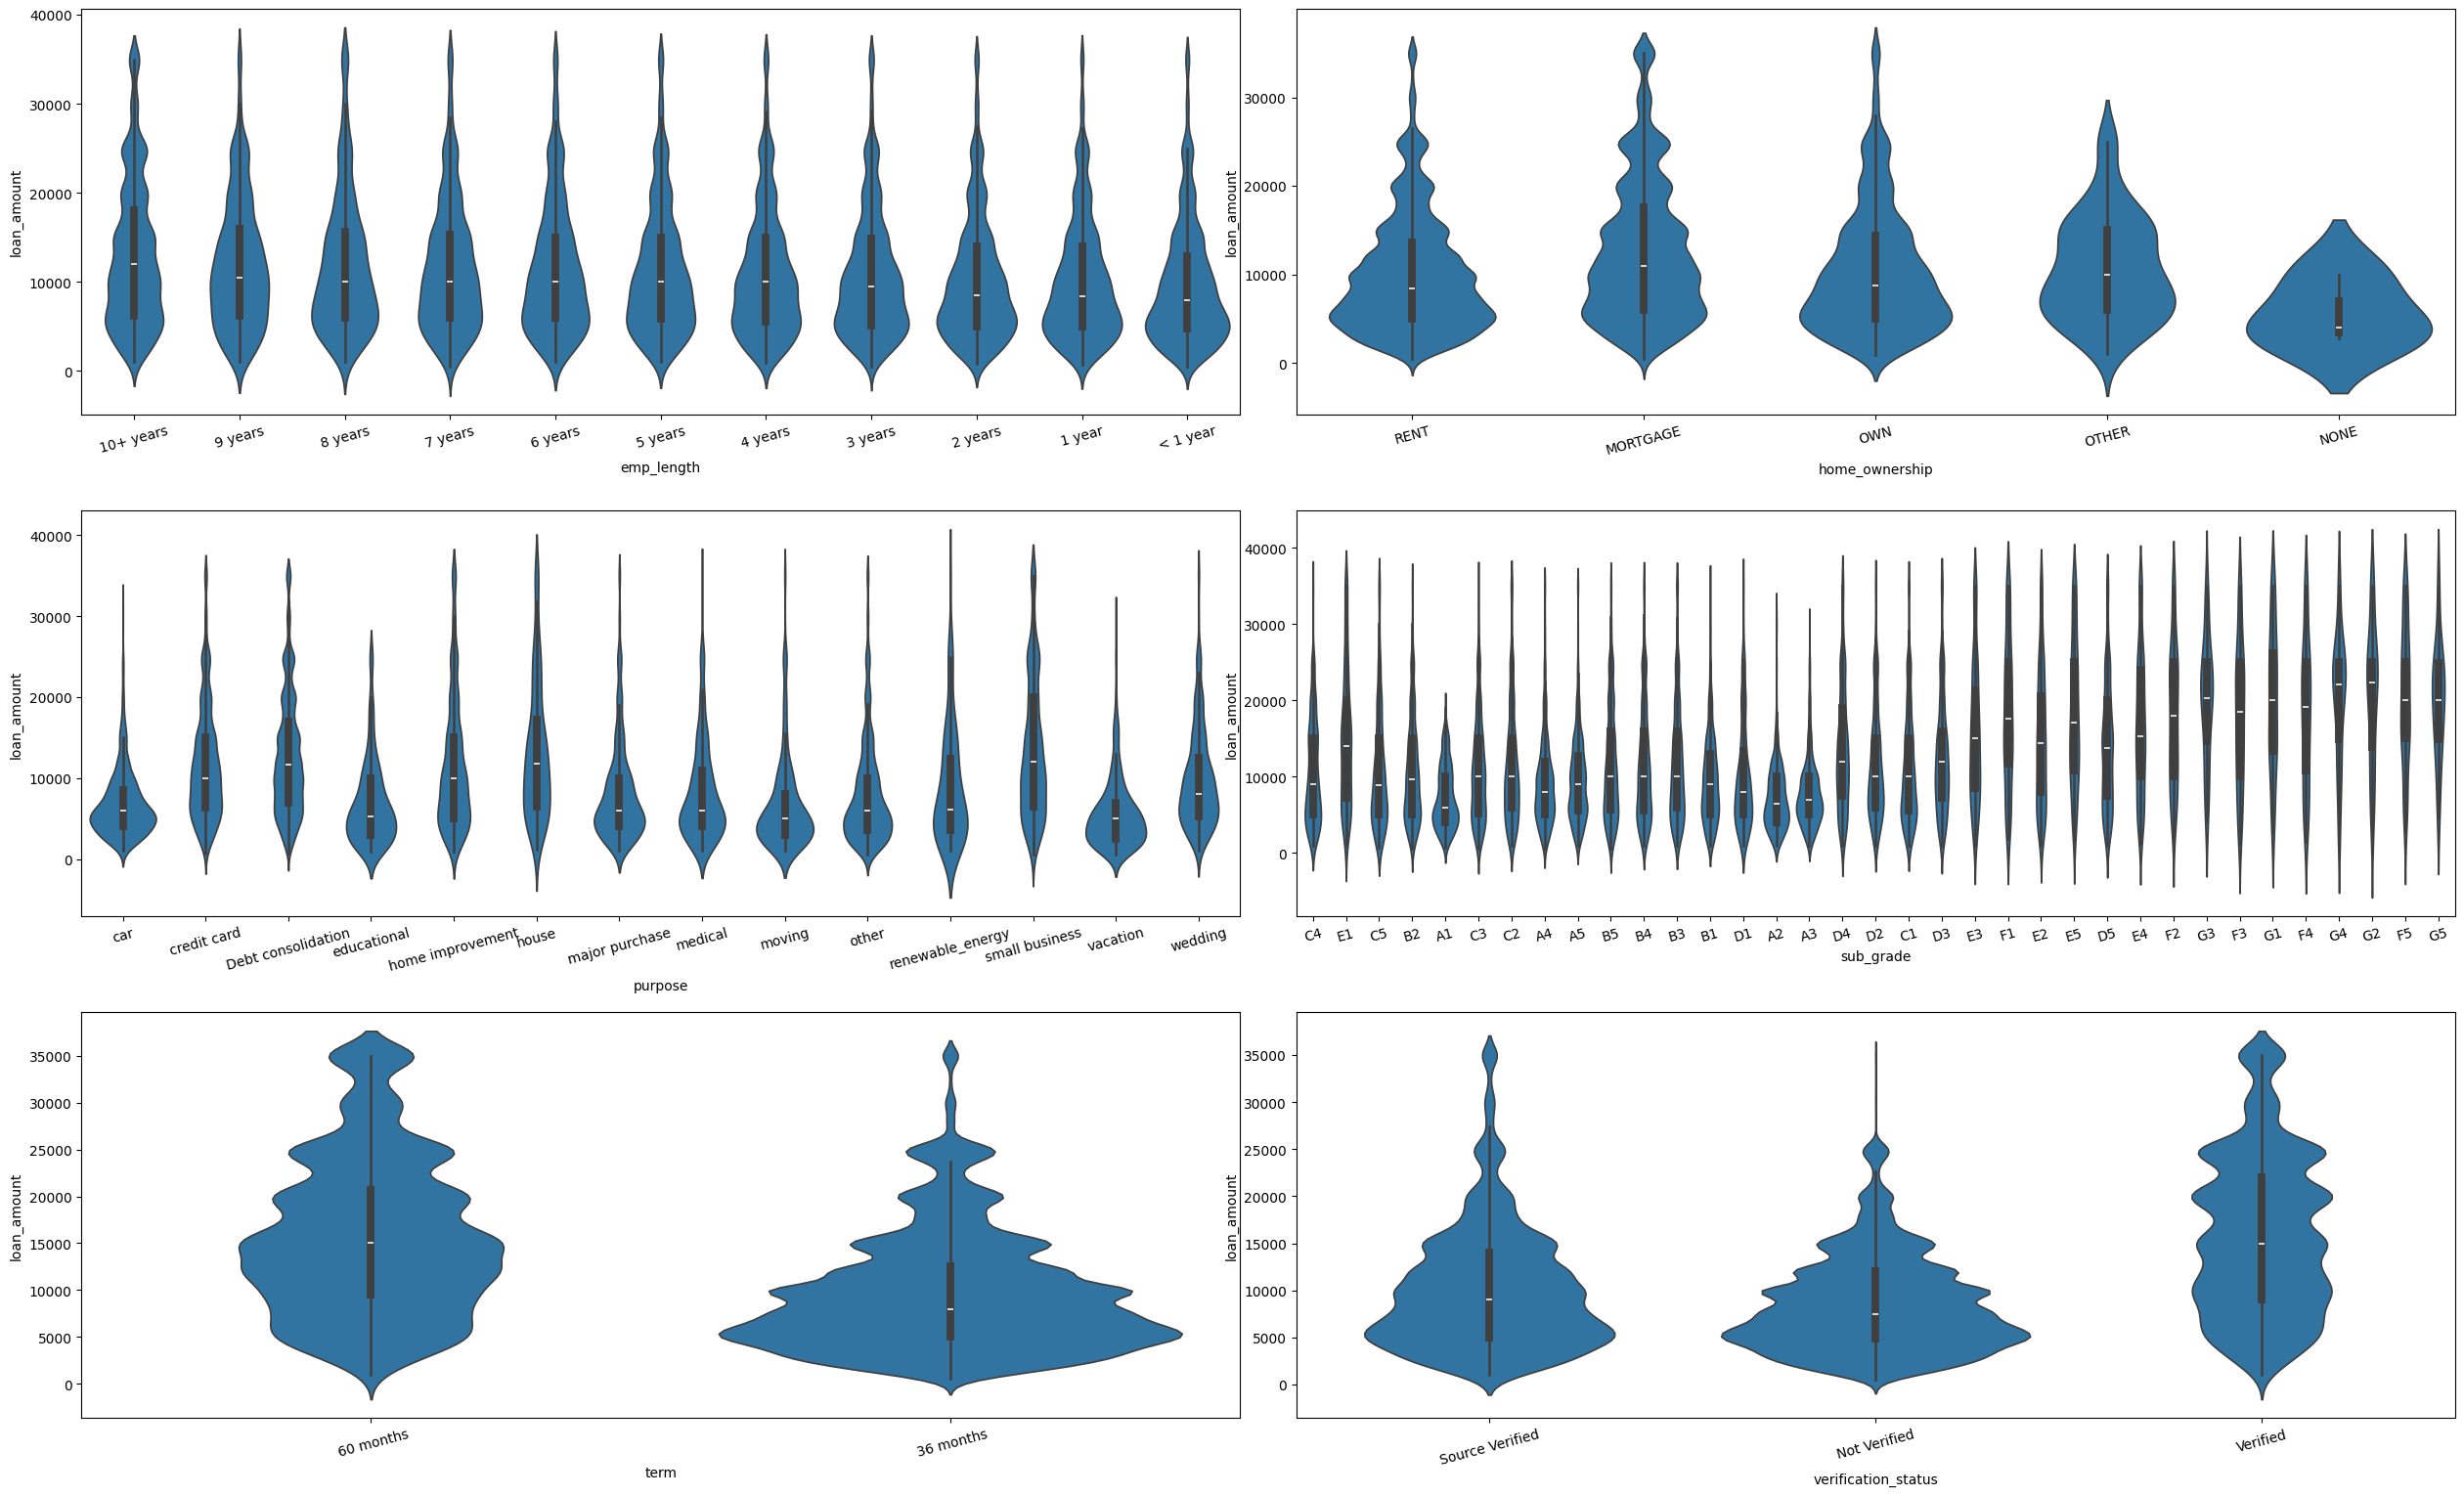

In [99]:
violingrid(df, cat_var, 'loan_amount', nrows=3, ncols=2)

**Employment Length vs. Loan Amount**
- The violin plots show that borrowers with longer employment histories (e.g., '10+ years', '9 years') tend to have distributions for loan_amount that extend to higher values, and often have a higher median loan amount. This suggests that stable employment is a factor in approving larger loans.
- Borrowers with shorter employment lengths (e.g., '< 1 year', '1 year') have loan_amount distributions concentrated at lower values, indicating they are typically approved for smaller loan amounts.

**Home Ownership vs. Loan Amount**
- MORTGAGE: This category show loan_amount distributions with higher medians and a wider spread towards larger loan amounts. This is often because homeowners (especially those with mortgages) are perceived as more financially stable.
- RENT: Borrowers who rent have loan_amount distributions concentrated at lower values, with fewer higher loan amounts compared to homeowners.
- NONE: Borrowers with No home ownership have the lowest medians

**Purpose vs. Loan Amount**
- Debt Consolidation, House and small business: These purposes show  distributions that include higher loan amounts with higher medians.


**Sub-Grade vs. Loan Amount**
- The distribution seems to show that grade G is which is the lowest grade getting approved for higher loan amounts. Borrowers with higher sub-grades (e.g., G1, G2, F1) are approved for significantly higher loan amounts, while those with lower sub-grades (e.g., A1, A2) are restricted to much smaller loans.
I will investigate this further.

**Term vs. Loan Amount**
- 36 months: Loans with a 36-month term show a distribution with a lower median loan_amount compared to 60-month loans with the shape showing that more loans with smaller loan amounts are approved.
- 60 months: Loans with a 60-month term have a distribution that includes higher loan_amounts, with a higher median. This is expected as longer terms are typically offered for larger loan principal amounts to keep monthly payments manageable.

**Verification Status vs. Loan Amount**
- Verified: This category show loan_amount distributions that are skewed towards higher values, with higher medians and wider spreads, especially when compared to 'Not Verified'. This suggests that when income is verified, lenders are more comfortable approving larger loan amounts.
- Not Verified: Loans with 'Not Verified' income have loan_amount distributions concentrated at lower values, indicating a more cautious lending approach when income verification is absent.

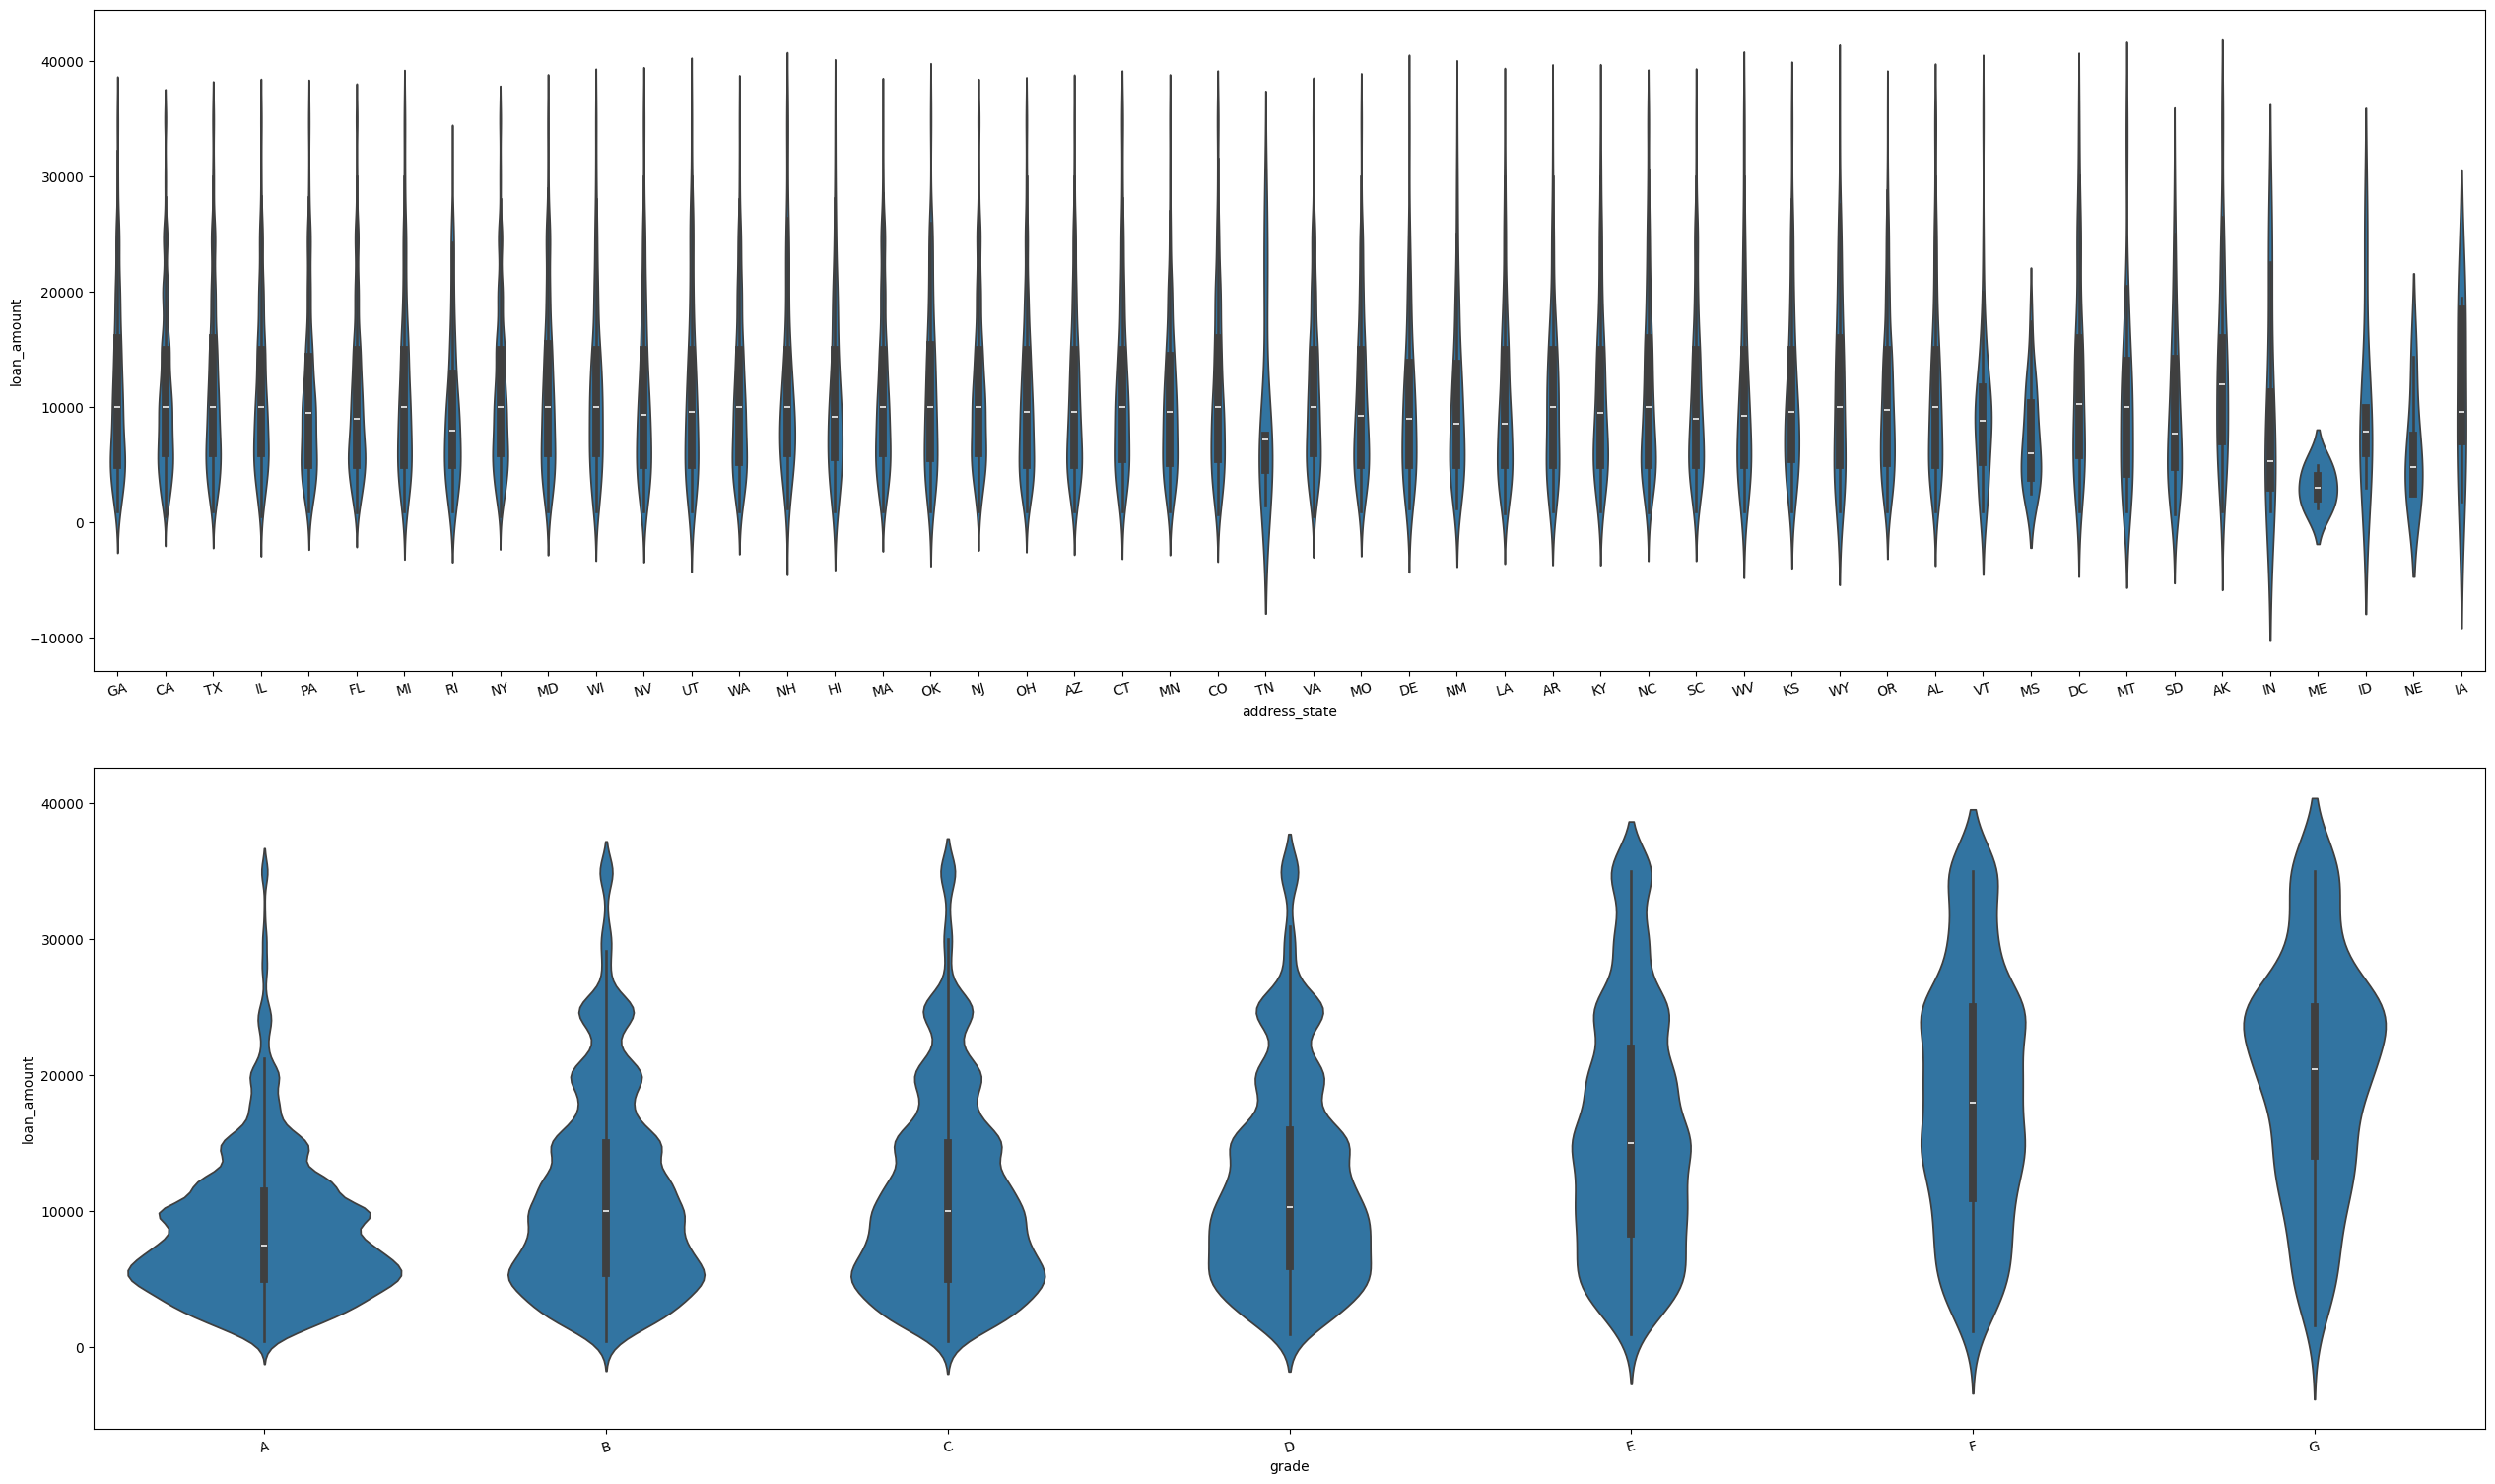

In [100]:
violingrid(df, ['address_state','grade'], 'loan_amount', nrows=2, ncols=1)

Key Insight:
- The address_state doesn't seem to have any serious correlation with the loan_amount
- The violinplot of the grade confirms my initial suspicion that higher loan amounts are given to grade G, suggesting that there could be some reason for this.

##### Correlation of some categorical variables against some numerical variables

<Figure size 1000x1000 with 0 Axes>

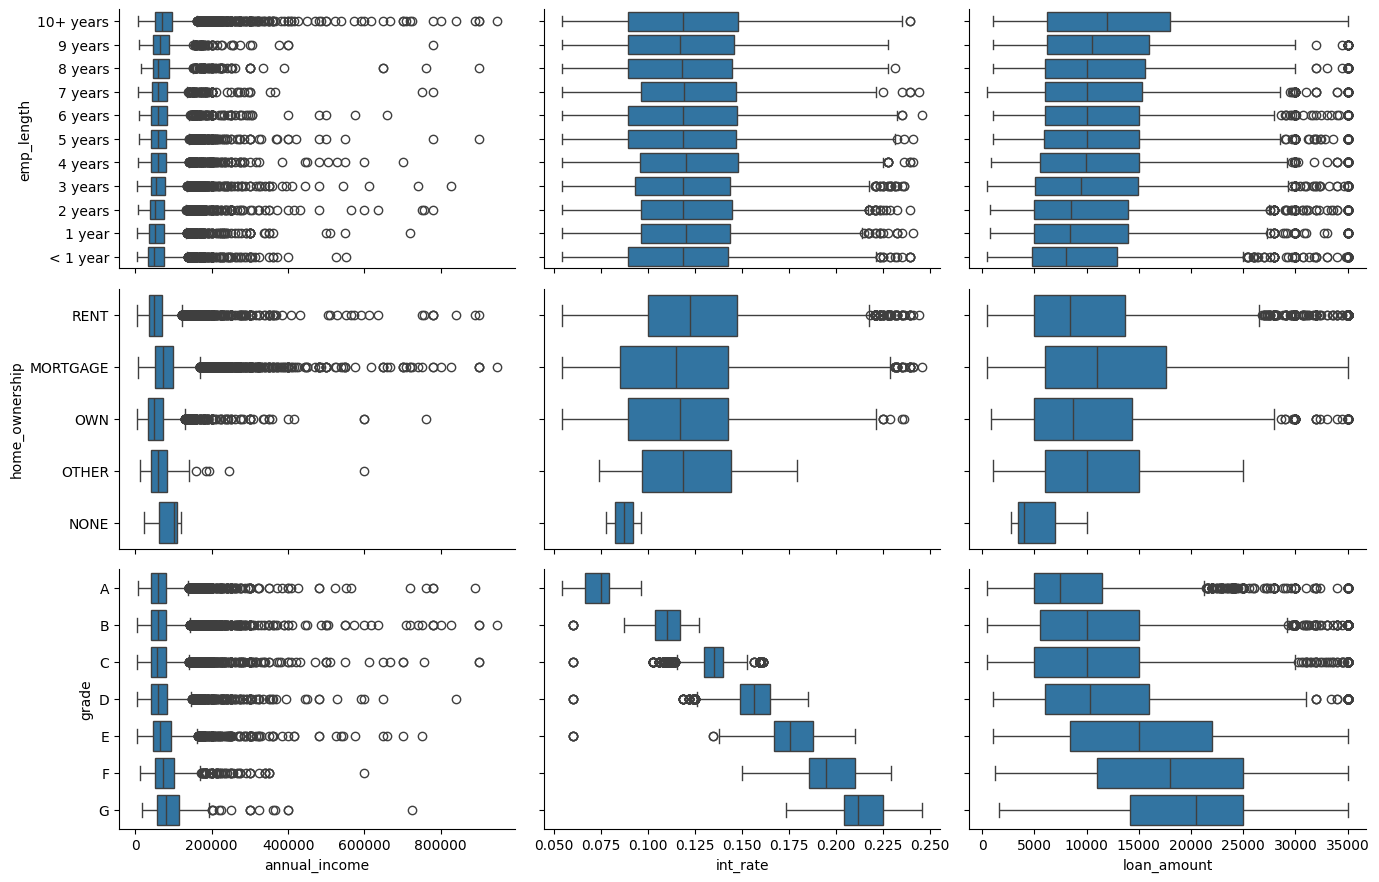

In [102]:
#visualizing the categorical variables against the numerical variables
cat_cols = ['emp_length', 'home_ownership', 'grade']
num_cols = [ 'annual_income', 'int_rate', 'loan_amount']

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data=df, y_vars=cat_cols, x_vars=num_cols, height=3, aspect=1.5)
g.map(boxgrid);

Just like earlier, we see strong correlation between:
- employment length and annual income
- grade and annual income
- grade and loan amounts

we also now see a good correlation between:
- home_ownership and interest rate
- grade and interest rate

*GRADE G*

If 'Grade G' loans are associated with both high interest rates, high loan amounts and high annual incomes, it suggests a few possibilities for this specific dataset:
- High Income, High Risk (for other reasons): It's possible that while these borrowers have high annual incomes, other factors are classifying them as high risk, leading to the 'G' grade and subsequently higher interest rates. These other factors could include a history of defaults, a high debt-to-income ratio (DTI) when considering all their financial obligations, recent negative credit events, or a loan purpose deemed riskier by the lender. Their high income might allow them to qualify for larger loans despite these other risks, but the lender mitigates that risk with a higher interest rate.
- Specific Loan Products/Segments: The 'Grade G' category might represent a particular segment of the loan market where high-income individuals seek loans that carry higher inherent risks or require more flexible terms, which translate into higher interest rates.

This combination of high income and high interest rates for 'Grade G' still points to it being a higher-risk category from the lender's perspective (as evidenced by the interest rate). The high income might just be the factor that enables these riskier, larger loans to be approved in the first place, allowing borrowers to potentially handle the higher payments.

*Grade A*

Lowest Interest Rates: This is the most direct indicator of 'Grade A' being the least risky credit grade. Lenders offer the most favorable (lowest) interest rates to borrowers they perceive as having the highest creditworthiness and lowest probability of default.

Lowest Annual Income: This might seem counter-intuitive at first glance if one equates high income directly with 'best' credit. However, it can indicate that 'Grade A' borrowers, while having lower incomes on average compared to some other grades, manage their finances exceptionally well. Their low-risk profile isn't necessarily due to immense wealth, but rather excellent credit behavior, stable employment (even if the income isn't top-tier), and responsible debt management.

Lowest Loan Amounts: This could be influenced by a couple of factors:
- Income-Based Lending: Lenders typically cap loan amounts based on a borrower's income to ensure affordability. If 'Grade A' borrowers have lower annual incomes, it's natural for their approved loan amounts to be lower.

So, while the income might be lower, the combination of lowest rates and lowest loan amounts for 'Grade A' strongly suggests it represents the segment of borrowers with the most reliable repayment behavior and least financial risk, even if they aren't the highest earners.

##### Loan Status correlation with the categorical variables.

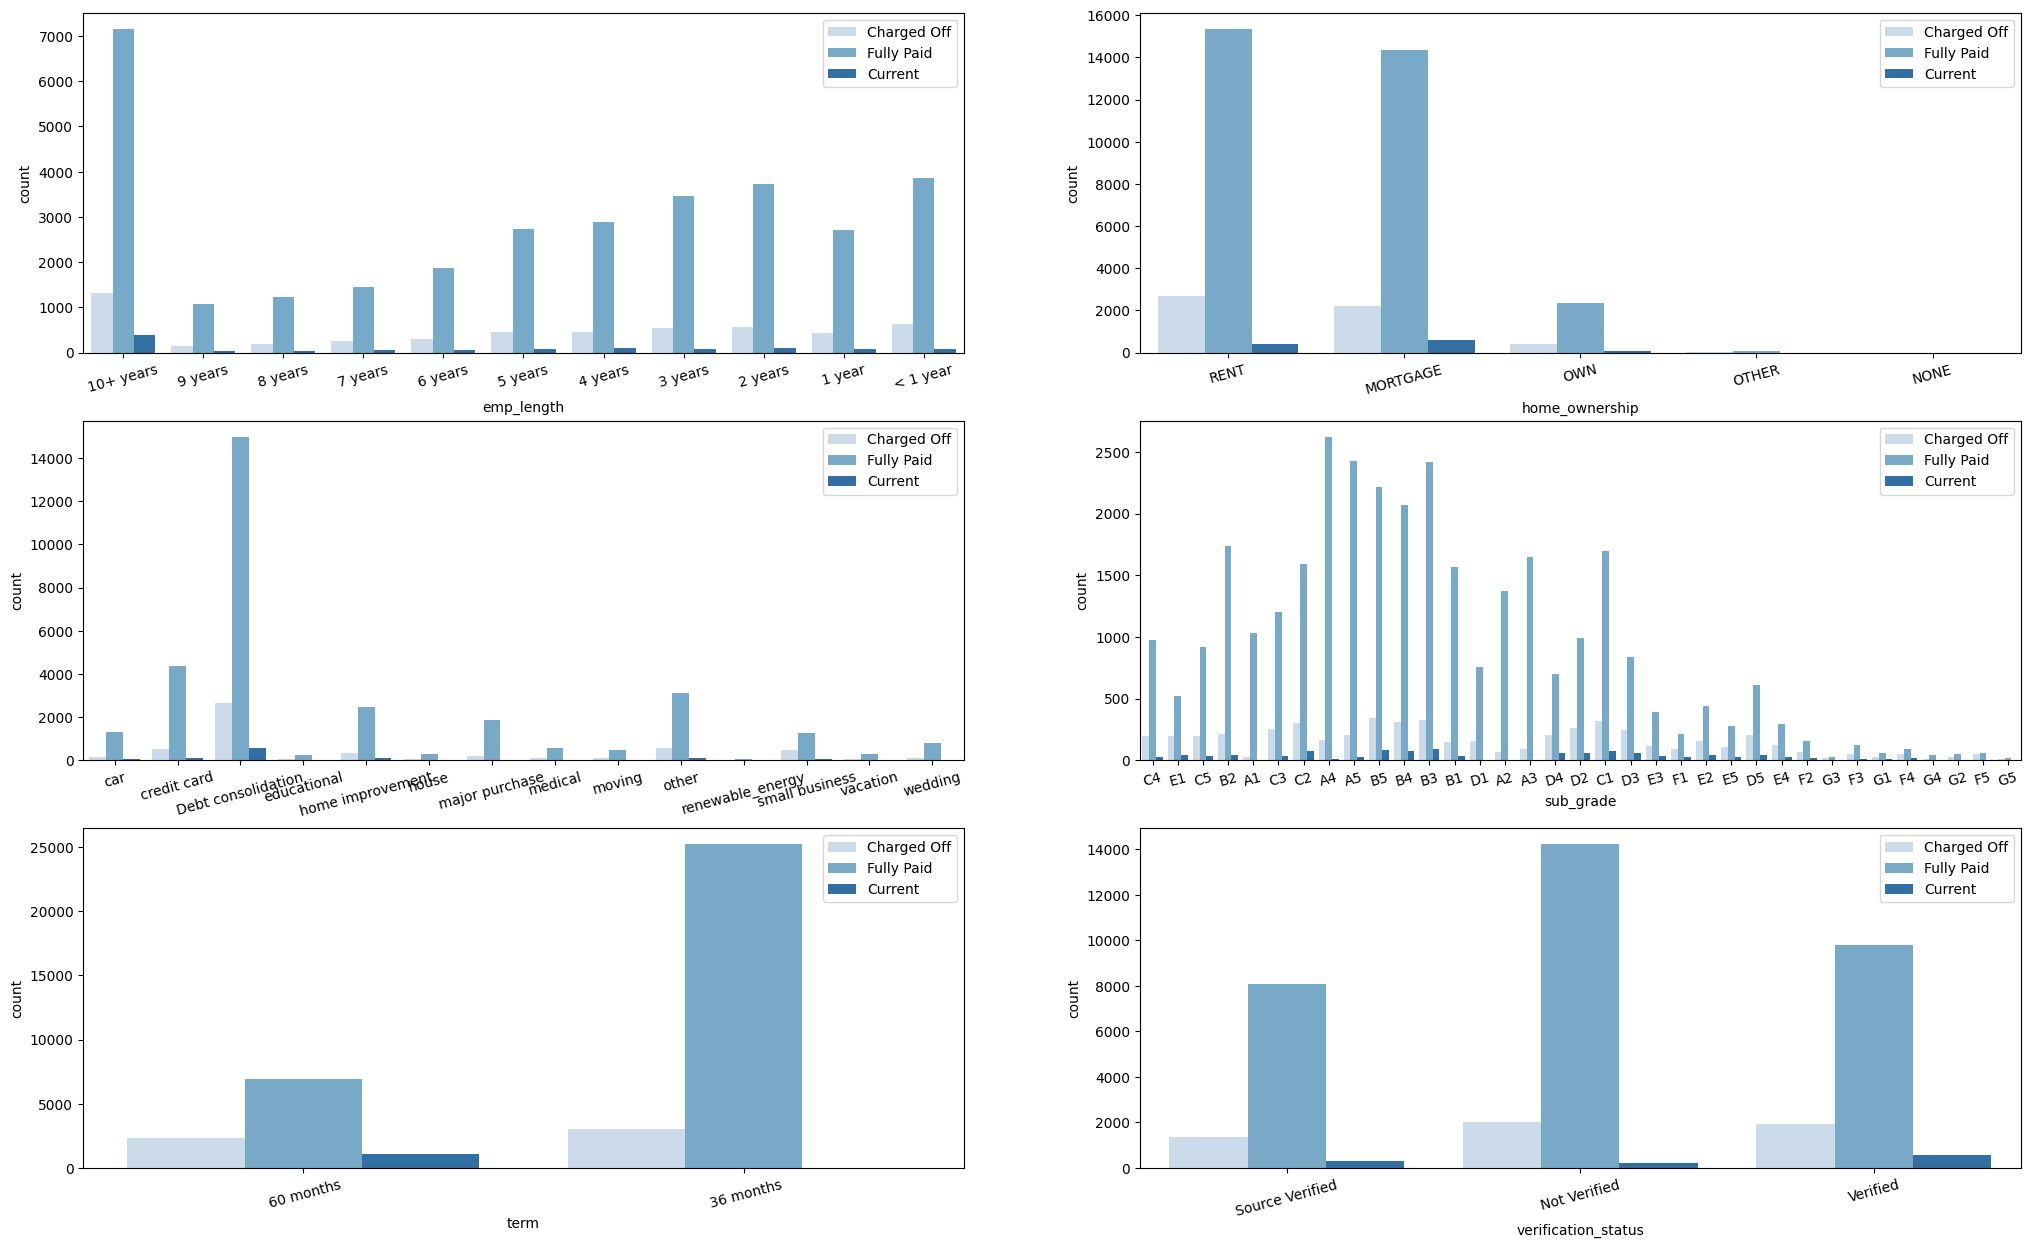

In [104]:
fig, axes = plt.subplots(3, 2, figsize=[25, 15])
axes = axes.flatten()
index = 0

for i in range(6):
    g = sns.countplot(data=df, hue='loan_status', x=cat_var[index], palette = 'Blues', ax=axes[i])
    g.tick_params(axis='x', labelrotation = 15)
    g.legend(loc = 1); # re-arrange legend to remove overlapping
    index += 1

**Employment Length vs. Loan Status**
- Across all employment lengths, 'Fully Paid' loans are consistently the most frequent. This is a positive indicator overall.
- There doesn't appear to be a drastic difference in the proportion of 'Charged Off' loans across different employment length categories, though '10+ years' (which has the most loans overall) also has a proportionally higher count of 'Charged Off' loans simply due to volume.
- Longer employment stability ('10+ years') is associated with a higher number of loans, and also a higher number of fully paid loans.

**Sub-Grade vs. Loan Status**
- 'Fully Paid' loans are the most common across all sub-grades.
As the sub-grade moves from 'A1' (best) towards 'G5' (worst), while 'Fully Paid' remains dominant, the proportion of 'Charged Off' loans tends to increase relative to 'Fully Paid'. This reinforces the idea that lower sub-grades carry higher risk.

**Verification Status vs. Loan Status**
- Not Verified and Source Verified categories account for the largest number of loans across all statuses, including 'Fully Paid' and 'Charged Off'.
- The distribution shows that 'Fully Paid' loans are most frequent regardless of verification status. However, a deeper dive into the proportions would be needed to see if 'Verified' loans have a significantly lower charge-off rate compared to 'Not Verified' or 'Source Verified' when normalized by their respective totals.

#### Multivariate Exploration

I would like to see how these variables: annual_income, dti, int_rate, and loan_amount, when plotted against each other, can influence our main variables of interest - Loan Status.

In [116]:
def multi_scatterplot(data, cat_var, x, y, xl, yl):
    """This function allows for plotting two numerical varaibles with our Loan Status"""
    ttype_markers = [['Charged Off', 'o'], ['Current', 's'], ['Fully Paid', '*']]

    plt.figure(figsize=(10, 6))
    for ttype, marker in ttype_markers:
        plot_data = df[df['loan_status'] == ttype]
        plt.scatter(data=plot_data, x=x , y=y, marker=marker)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.legend(['Charged Off', 'Current', 'Fully Paid'], title='Loan Status')
    plt.title('Plot of ' + str(yl) + ' against ' + str(xl) + ' on levels of the ' + str(cat_var) + ' variable', y=1.05);

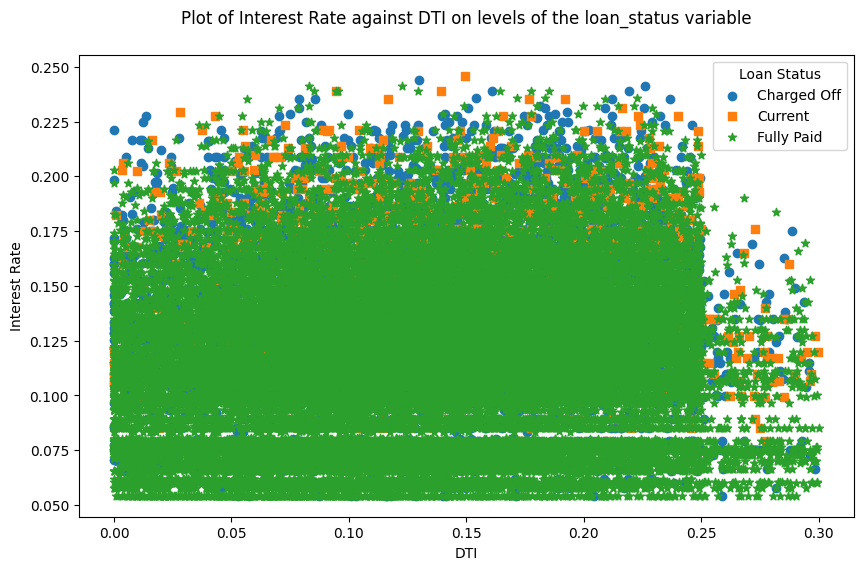

In [119]:
multi_scatterplot(df, 'loan_status', x='dti', y='int_rate', xl='DTI',
                  yl='Interest Rate');

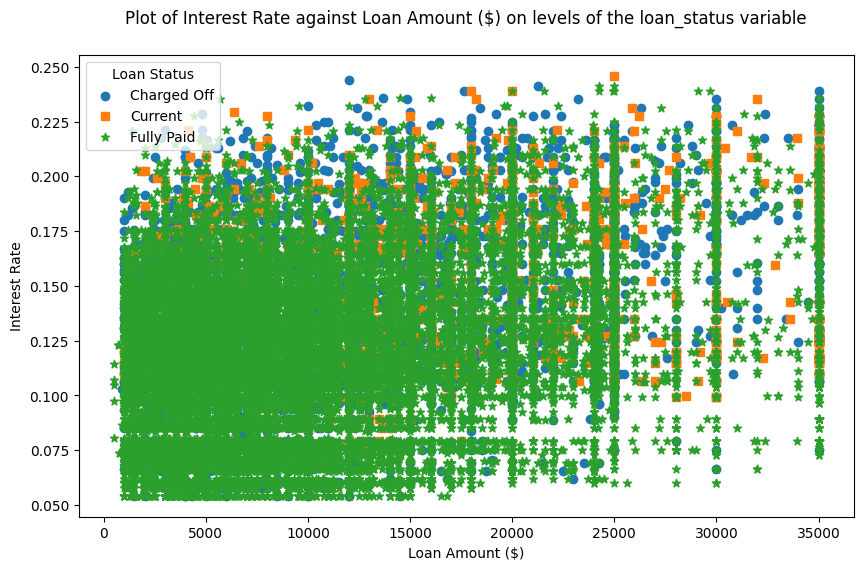

In [121]:
multi_scatterplot(df, 'loan_status', x='loan_amount', y='int_rate', xl='Loan Amount ($)',
                  yl='Interest Rate');

Key Insights:

**DTI (Debt-to-Income) vs. Interest Rate (colored by Loan Status)**
- Fully Paid loans are predominantly found in the lower interest rate spectrum, also predominantly below 25% DTI. This reinforces that lower interest rates and lower DTIs are characteristic of likelu good loans.
- Charged Off loans are noticeably present in the higher interest rate areas, extending to higher DTI values. This further supports the observation that higher interest rates and higher DTI are associated with a greater likelihood of a loan being charged off.

**DTI (Loan Amount) vs. Interest Rate (colored by Loan Status)**

- Fully Paid loans generally occupy the lower-to-mid range of interest rates across various loan amounts. While they can be found for both small and large loan amounts, they are heavily concentrated where interest rates are lower.
- Charged Off Loans (marked by 'o'): These loans are notably present in the higher interest rate and higher loan amount regions. This suggests that loans with higher interest rates, have a greater propensity to be charged off.